In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import aux
import matplotlib.pyplot as plt
import pandas as pd

- This notebook contains the code to reproduce the analysis and plotting for the third figure, using the companion dataset (which gives summary statistics for all plastic spiking networks simulated on the ISTA cluster)  
  
- Each section can be run independently 

### Familiarity/novelty detection datasets (Fig3.A)

In [3]:
# load the experimental dataset
file_path_fam = "../data/S_fam.txt" # data from Lim et al. 2015 (see paper for details)
with open(file_path_fam, 'r') as file:
    data = file.read()
fams = [list(map(float, line.split())) for line in data.split('\n') if line.strip()]
indices_odd = [i for i in range(len(fams)) if i%2!=0]
fams = np.array([fams[i] for i in indices_odd])

file_path_nov = "../data/S_nov.txt"
with open(file_path_nov, 'r') as file:
    data = file.read()
novs = [list(map(float, line.split())) for line in data.split('\n') if line.strip()]
indices_odd = [i for i in range(len(novs)) if i%2!=0]
novs = np.array([novs[i] for i in indices_odd])

mean_data_fam = np.mean(fams.flatten(), axis=0)
mean_data_nov = np.mean(novs.flatten(), axis=0)
std_data_fam = np.std(fams.flatten(), axis=0)
std_data_nov = np.std(novs.flatten(), axis=0)
dr_data = 2*(mean_data_nov - mean_data_fam) / (mean_data_nov + mean_data_fam)
dsr_data = 2*(std_data_nov - std_data_fam) / (std_data_nov + std_data_fam)

print("global mean for familiar", mean_data_fam, "Hz")
print("global mean for novel", mean_data_nov, "Hz")
print("global std for familiar", std_data_fam, "Hz")
print("global std for novel", std_data_nov, "Hz")
print("relative pref for novel", dr_data)
print("relative std pref for novel", dsr_data)

global mean for familiar 13.554044941802417 Hz
global mean for novel 15.598665167248194 Hz
global std for familiar 16.07811485492507 Hz
global std for novel 19.900825379002885 Hz
relative pref for novel 0.14026965025189989
relative std pref for novel 0.2124971163254564


In [4]:
# load simulation data, 2500 rule quartets, 5 runs (trials) per rule on the familiarity task, all with break periods from 1s to 4h (10 break times)
save_dir = "../data/"
data1 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_19082024_metrics.npy",))
data2 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_20082024_metrics.npy",))
data3 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_17092024_metrics.npy",))
data4 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_22092024_metrics.npy",))
data5 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_24092024_metrics.npy",))
dataset_list = [data1, data2, data3, data4, data5]
n_rules = len(data1)

# compute delta r mem and delta sigma r mem for each rule, each break time and each dataset
dr = np.array([2*(d['r_nov'] - d['r_fam']) / (d['r_nov'] + d['r_fam']+0.01) for d in dataset_list])
mdr = np.nan_to_num(np.mean(dr, axis=0), nan=0.0) # mean dr across runs
# same for delta sigma r mem
dsr = np.array([2*(d['std_nov'] - d['std_fam']) / (d['std_nov'] + d['std_fam']+0.01) for d in dataset_list])
mdsr = np.nan_to_num(np.mean(dsr, axis=0), nan=0.0) # mean dsr across runs

# also load 100 simlations of static networks
dataset_static = aux.load_and_merge(save_dir,("100static_1s4hBreaks_12082024_metrics.npy",))
dr_static = 2*(dataset_static['r_nov'] - dataset_static['r_fam']) / (dataset_static['r_nov'] + dataset_static['r_fam']+0.01)
dsr_static = 2*(dataset_static['std_nov'] - dataset_static['std_fam']) / (dataset_static['std_nov'] + dataset_static['std_fam']+0.01)

retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 100/100 simulations


6


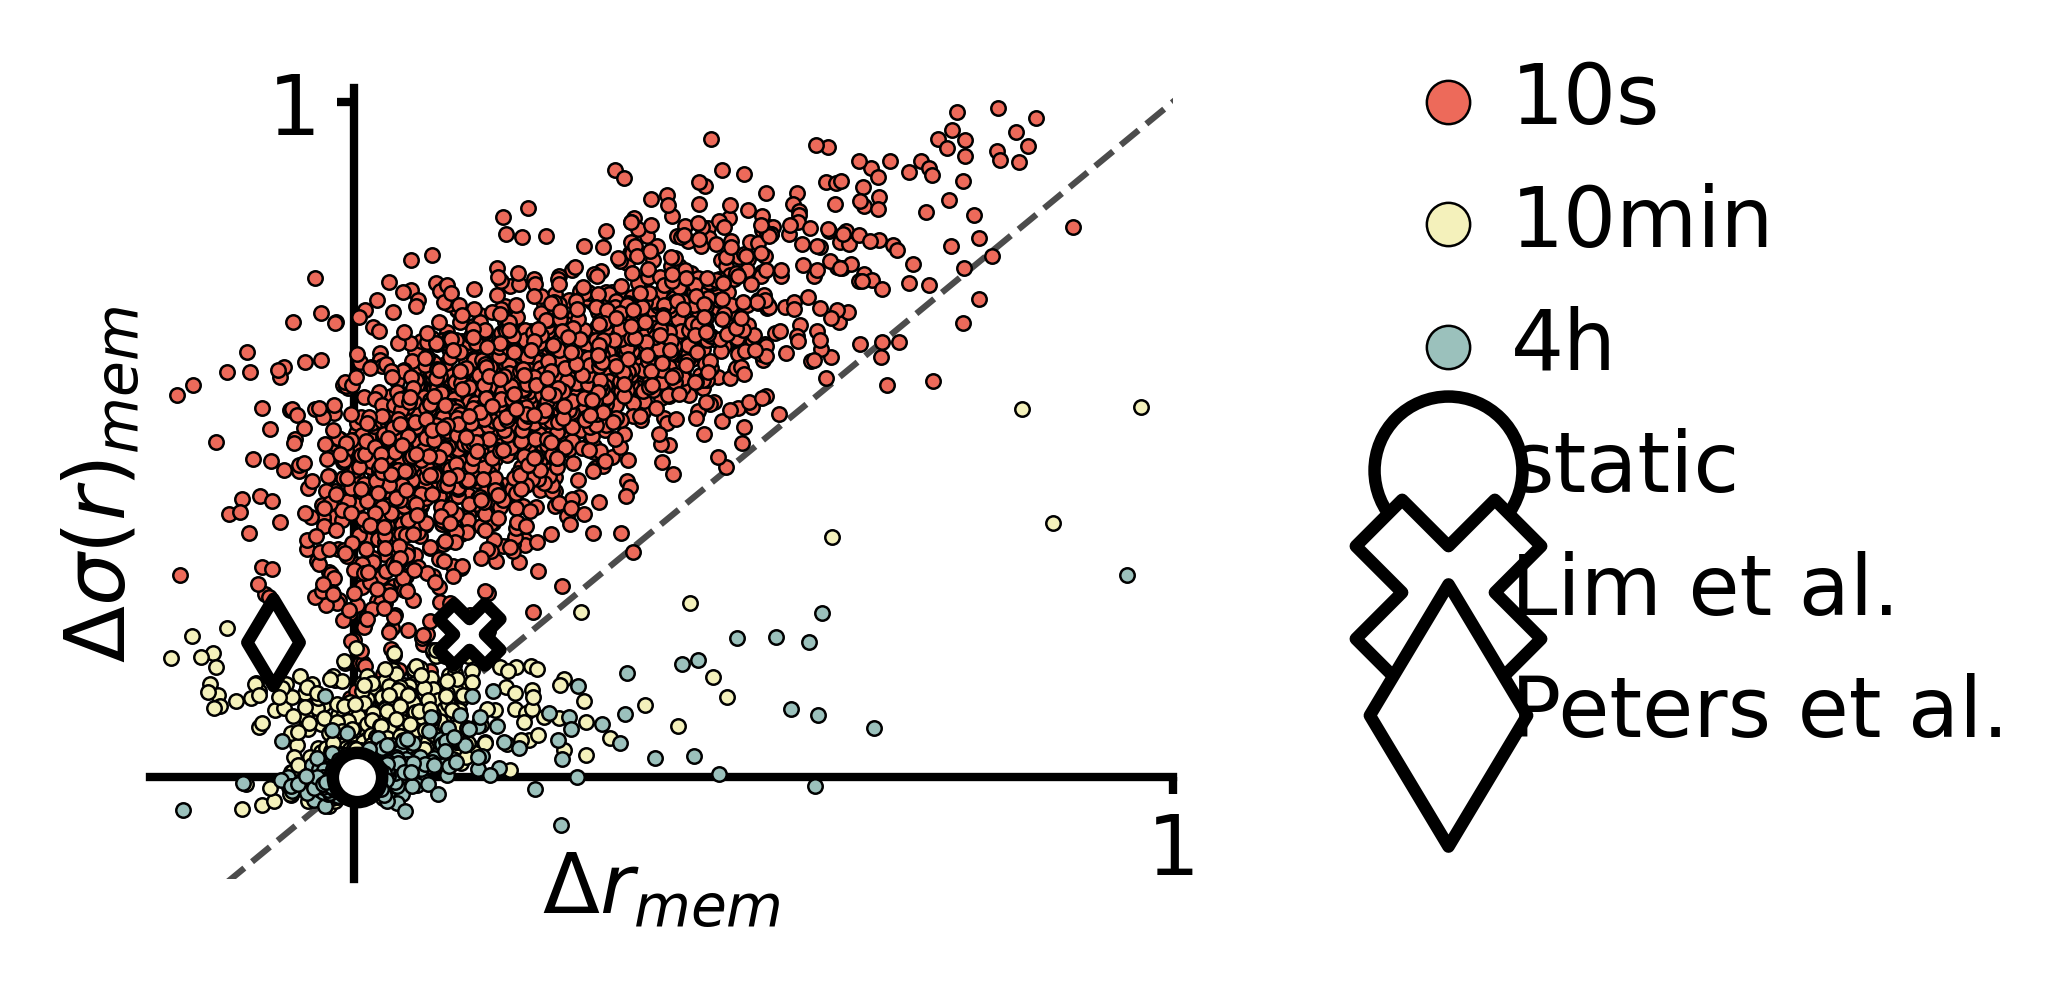

In [5]:
aux.plot_significance_2t_1metric({'0': mdr[:,1], '1': mdr[:,6], '2': mdr[:,-1], '3': np.mean(dr_static[:,9]), '4': dr_data, '5': -0.1},
                {'0': mdsr[:,1], '1': mdsr[:,6], '2': mdsr[:,-1], '3': np.mean(dsr_static[:,9]), '4': dsr_data, '5': 0.2},
                r'$\Delta r_{mem}$',
                r'$\Delta \sigma(r)_{mem}$',
                labels=["10s",
                        "10min",
                        "4h", 
                        "static",
                        'Lim et al.',
                        "Peters et al."],
                colors=['#ed6a5a', '#f4f1bb', '#9bc1bc', "white", 'white', 'white'], 
                edgecolors=['black', 'black', 'black', "black", 'black', 'black'],
                linewidth_marker= [0.3,0.3,0.3,1.5,1.5, 1.5], #[0.15,0.15,0.15,0.15,0.3], [0.15,0.15,0.15,0.5,1, 1]
                s= [3,3,3,35,55,55], #[3,3,3,35,55,55] or [3,3,3,3,3,3]
                linewidth = 1, 
                xlim = [-0.25,1], 
                ylim = [-0.15,1.02],
                figsize=(2.2,1.71),
                xticks=[1],
                yticks=[1],
                xhandlepad=-5,
                yhandlepad=15,
                center_axes = True,
                dpi=600,
                color_xlabel="black",
                color_ylabel="black",
                marker=['o','o','o','o','X', 'd'],
                linewidth_line=0.75,
                color_line="black",
                which_line = "diag",
                alpha_line=0.7,
                xticklabels=None,
                yticklabels=None,
                zorder_line=0.1,
                bbox_to_anchor=(1.2,1.1),
                labelspacing=0.5,
                handletextpad=0.5,
                fontsize=10)

### Allen data analysis (Fig3.B,C&D)

In [6]:
# load simulation data, 2500 rule quartets, 5 runs (trials) per rule on the familiarity task, all with break periods from 1s to 4h (10 break times)
save_dir = "../data/"
data1 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_19082024_metrics.npy",))
data2 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_20082024_metrics.npy",))
data3 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_17092024_metrics.npy",))
data4 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_22092024_metrics.npy",))
data5 = aux.load_and_merge(save_dir,("2500_1s4hBreaks_24092024_metrics.npy",))
dataset_list = [data1, data2, data3, data4, data5]

dr = np.array([2*(d['r_nov'] - d['r_fam']) / (d['r_nov'] + d['r_fam']+0.01) for d in dataset_list])
dsr = np.array([2*(d['std_nov'] - d['std_fam']) / (d['std_nov'] + d['std_fam']+0.01) for d in dataset_list])

n_rules = len(data1)
mdr = np.nan_to_num(np.mean(dr, axis=0), nan=0.0)
mdr_10min = mdr[:,6]

breaks = [1, 9, 10, 40, 60, 180, 300, 600, 2400, 10800]
ts = [ np.sum(breaks[:i]) for i in range(1,len(breaks)+1) ]

retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 2500/2500 simulations
retrieved 2500/2500 simulations


In [7]:
# load and process experimental data
# compute the delta r mem for each region and animal
mdr_perAnimal_CA1 = aux.get_dr_perAnimal_1region('../data/cell_by_trial_scalars_CA1.h5')
mdr_perAnimal_LGd = aux.get_dr_perAnimal_1region('../data/cell_by_trial_scalars_LGd.h5')
mdr_perAnimal_V1_L23 = aux.get_dr_perAnimal_1region('../data/cell_by_trial_scalars_V1_Layer23.h5')
mdr_perAnimal_V1_L4 = aux.get_dr_perAnimal_1region('../data/cell_by_trial_scalars_V1_LayerIV.h5')
mdr_perAnimal_V1_L5 = aux.get_dr_perAnimal_1region('../data/cell_by_trial_scalars_V1_LayerV.h5')
mdr_perAnimal_V1_L6 = aux.get_dr_perAnimal_1region('../data/cell_by_trial_scalars_V1_LayerVI.h5')

# average over animals for each region
dr_CA1 = np.mean(mdr_perAnimal_CA1)
dr_LGd = np.mean(mdr_perAnimal_LGd)
dr_V1_L23 = np.mean(mdr_perAnimal_V1_L23)
dr_V1_L4 = np.mean(mdr_perAnimal_V1_L4)
dr_V1_L5 = np.mean(mdr_perAnimal_V1_L5)
dr_V1_L6 = np.mean(mdr_perAnimal_V1_L6)

print('Delta r_mem_CA1', np.mean(mdr_perAnimal_CA1))
print('Delta r_mem_LGd', np.mean(mdr_perAnimal_LGd))
print('Delta r_mem_V1_L23', np.mean(mdr_perAnimal_V1_L23))
print('Delta r_mem_V1_L4', np.mean(mdr_perAnimal_V1_L4))
print('Delta r_mem_V1_L5', np.mean(mdr_perAnimal_V1_L5))
print('Delta r_mem_V1_L6', np.mean(mdr_perAnimal_V1_L6))

number of sessions (animals): 20
number of sessions (animals): 20
number of sessions (animals): 20
number of sessions (animals): 20
number of sessions (animals): 20
number of sessions (animals): 20
Delta r_mem_CA1 -0.4792996425741114
Delta r_mem_LGd -0.5134685158084252
Delta r_mem_V1_L23 0.5847345393268084
Delta r_mem_V1_L4 0.16953874794689272
Delta r_mem_V1_L5 0.12603215416561242
Delta r_mem_V1_L6 -0.10293424260684694


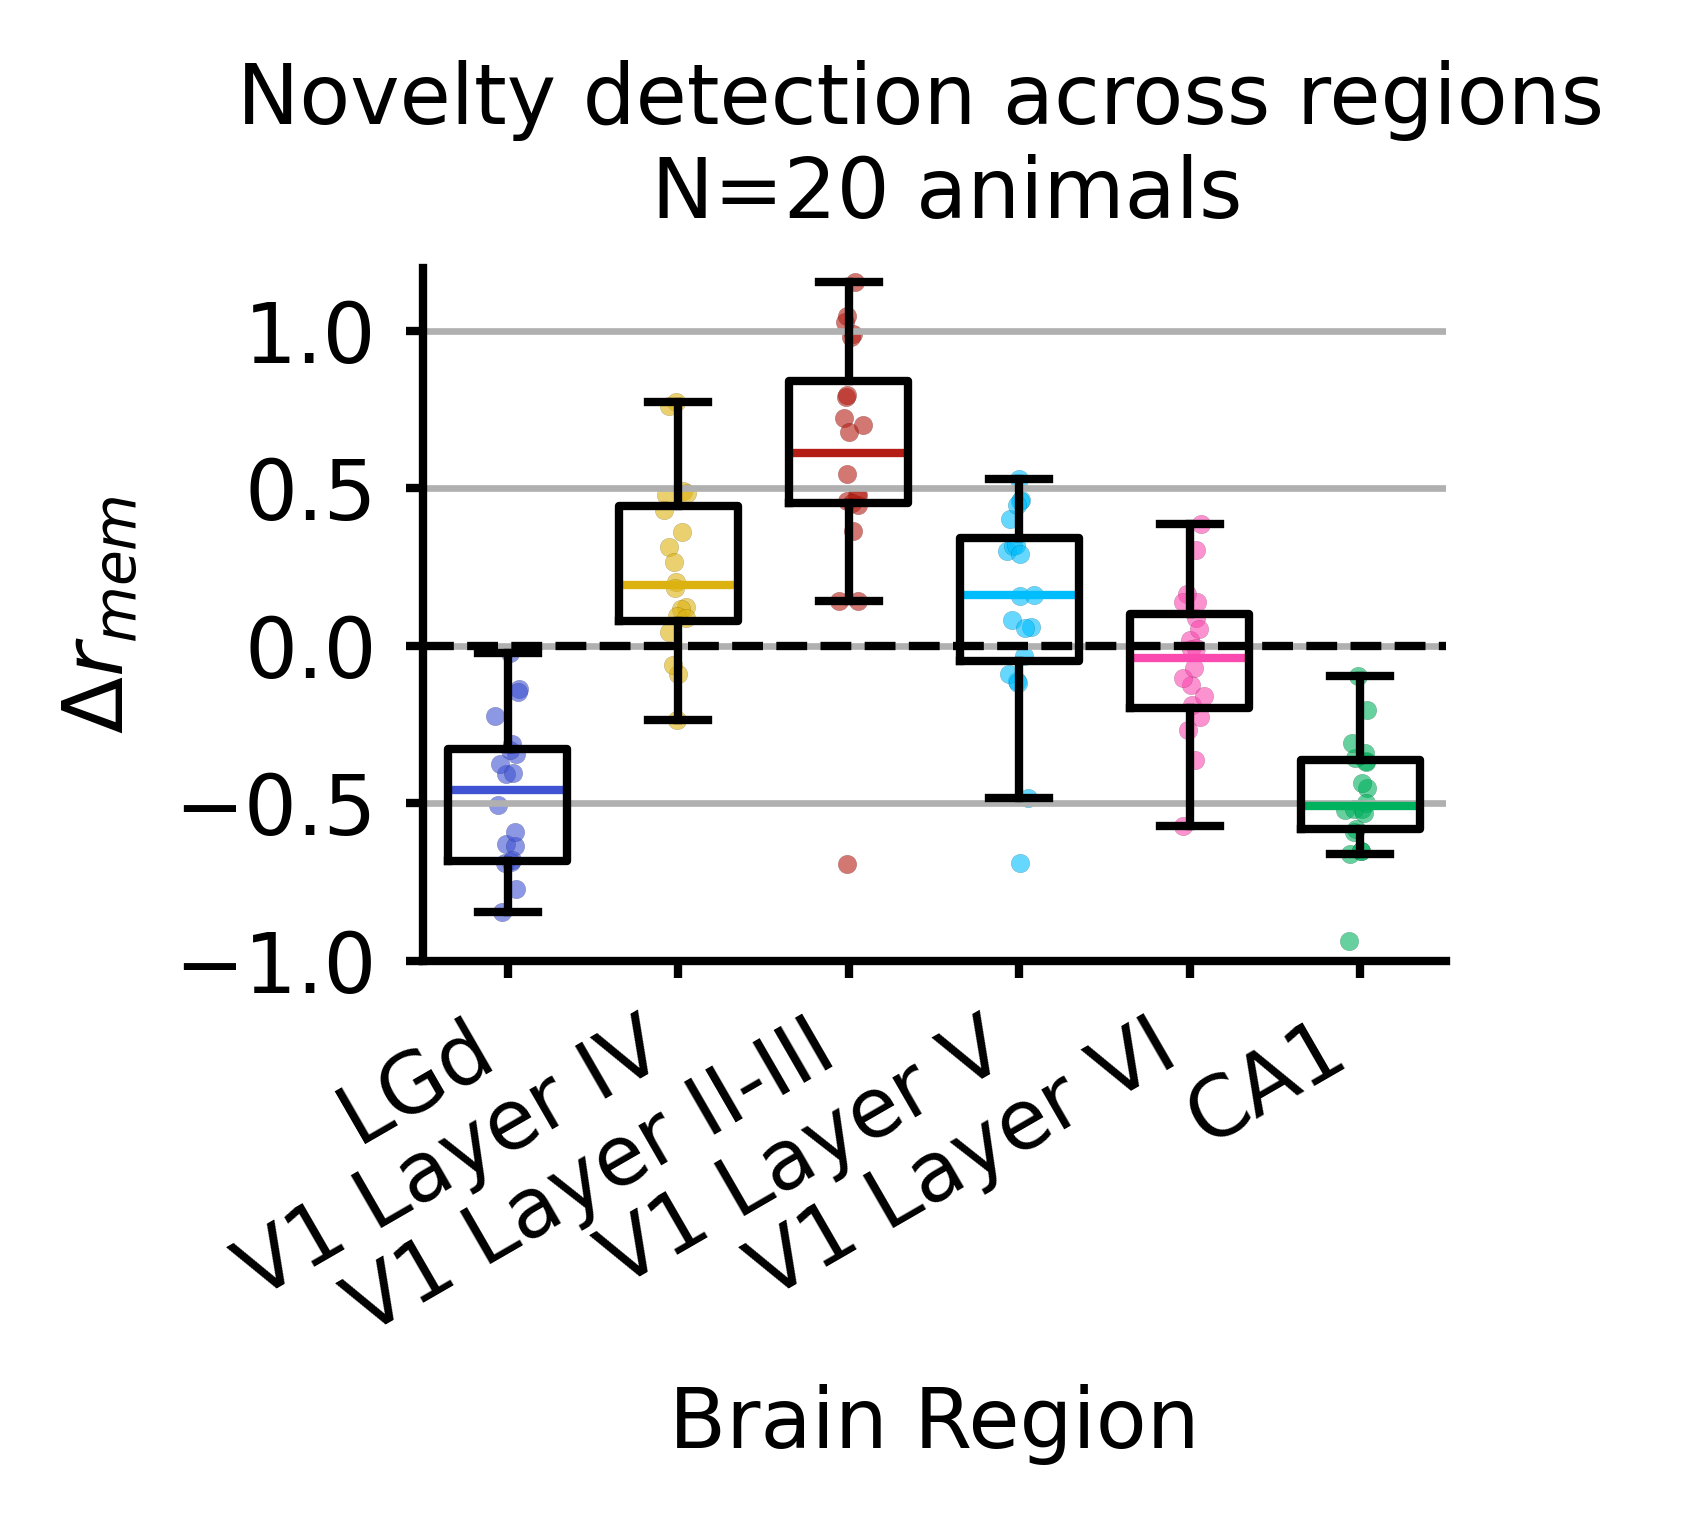

In [8]:
# make the plot
figsize = (2.2, 1.5)
dpi = 600
axwidth = 1
fontsize = 10
linewidth = 1
marker_size = 5

color_list = [(r/256, g/256, b/256) for (r,g,b) in [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93),]]
labels = ['LGd', 'V1 Layer IV', 'V1 Layer II-III',  'V1 Layer V', 'V1 Layer VI', 'CA1']
data_to_plot = [mdr_perAnimal_LGd, mdr_perAnimal_V1_L4, mdr_perAnimal_V1_L23,  mdr_perAnimal_V1_L5, mdr_perAnimal_V1_L6, mdr_perAnimal_CA1]
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
for i, d in enumerate(data_to_plot):
    x = np.random.normal(i+1, 0.04, size=len(d))  # add some random "jitter" to the x-axis
    ax.scatter(x, d, alpha=0.6, s=marker_size, color=color_list[i], edgecolors='k', linewidth=0.02)
box1 = ax.boxplot(data_to_plot,
                  labels=labels,
                  showfliers=False,
                  showcaps=True,
                  boxprops=dict(linewidth=linewidth),
                  medianprops=dict(linewidth=linewidth),
                  whiskerprops=dict(linewidth=linewidth),
                  widths=0.7,)
# change the color of each box individually
for i, color in enumerate(color_list):
    box1['boxes'][i].set(zorder=10)
    box1['medians'][i].set(color=color)

ax.set_xlabel('Brain Region', fontsize=fontsize)
ax.set_ylabel(r'$\Delta r_{mem}$', fontsize=fontsize)
plt.title('Novelty detection across regions \n N=20 animals', fontsize=fontsize)
ax.axhline(0, color='k', linestyle='--', linewidth=linewidth)
ax.set_ylim(-1, 1.2)
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
plt.grid(axis='y')
plt.xticks(rotation=30, fontsize=fontsize, ha='right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(axwidth)
ax.spines['left'].set_linewidth(axwidth)
ax.tick_params(width=axwidth, labelsize=fontsize, length=2*axwidth)
plt.show()

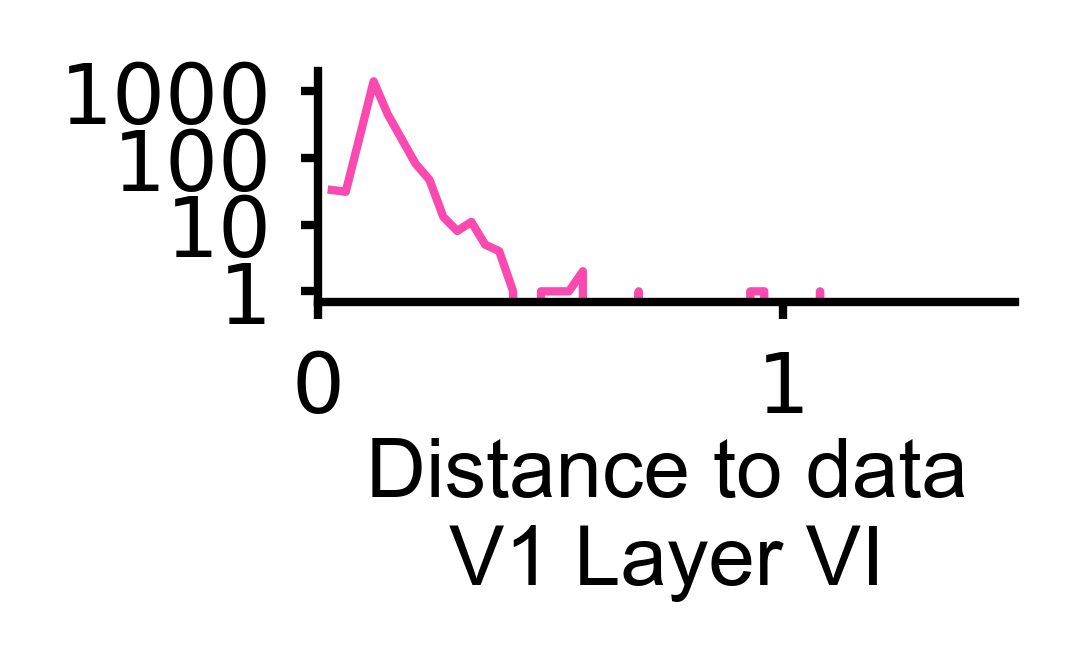

In [9]:
# plot distance distributions (Fig3.C)
distance_CA1 = np.abs(mdr_10min - dr_CA1)
distance_LGd = np.abs(mdr_10min - dr_LGd)
distance_V1_L23 = np.abs(mdr_10min - dr_V1_L23)
distance_V1_L4 = np.abs(mdr_10min - dr_V1_L4)
distance_V1_L5 = np.abs(mdr_10min - dr_V1_L5)
distance_V1_L6 = np.abs(mdr_10min - dr_V1_L6)

color_list = [(r/256, g/256, b/256) for (r,g,b) in [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93),]]
labels = ['LGd', 'V1 Layer IV', 'V1 Layer II-III',  'V1 Layer V', 'V1 Layer VI', 'CA1']

distances = [distance_LGd, distance_V1_L4, distance_V1_L23,  distance_V1_L5, distance_V1_L6, distance_CA1]
which_region = 4 # to change to get the other plots

aux.plot_distance_distribution(
        data_1D=distances[which_region],
        n_bins=50, 
        range = [0,1.5],
        log_scale=True,
        x_lim=[0,1.5],
        x_ticks=[0,1],
        x_ticklabels=None,
        x_label='Distance to data\n' + labels[which_region],
        y_lim=None,
        y_ticks=[1,10,100,1000],
        y_ticklabels=[1,10,100,1000],
        y_label=None, 
        figsize=(1.5,0.5),
        linewidth=1,
        title=None,
        fontsize=10,
        font="arial",
        color=color_list[which_region],
        rotation=45)

/Users/bcfx/Documents/Memory1000Rules/Code/Code_For_Paper/results/aux.py:304: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1729646995093/work/aten/src/ATen/native/TensorShape.cpp:3687.)
  rules_tiled = torch.tile(rules, (n_timebins, 1, 1)).T # size [n_rules, n_timebins]


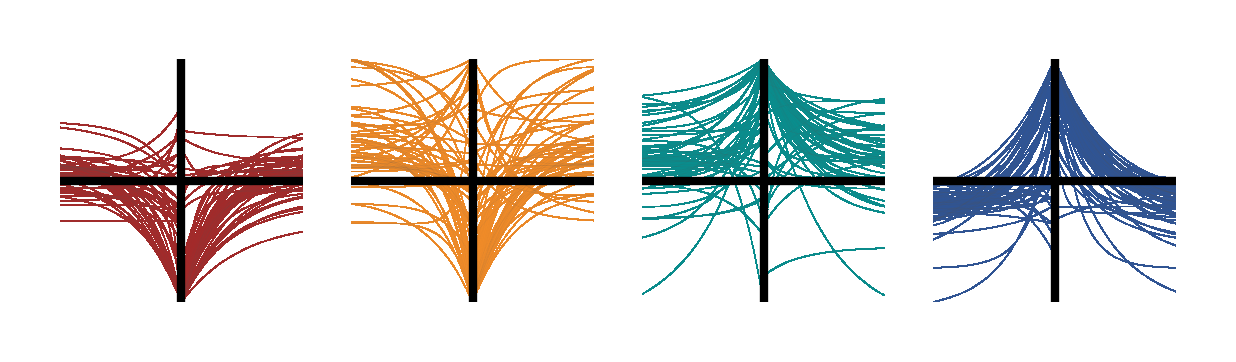

In [10]:
# plot the 50 best fits to each region
n_to_select = 50
ind_rules_CA1 = np.argsort(distance_CA1)[:n_to_select]
ind_rules_LGd = np.argsort(distance_LGd)[:n_to_select]
ind_rules_V1_L23 = np.argsort(distance_V1_L23)[:n_to_select]
ind_rules_V1_L4 = np.argsort(distance_V1_L4)[:n_to_select]
ind_rules_V1_L5 = np.argsort(distance_V1_L5)[:n_to_select]
ind_rules_V1_L6 = np.argsort(distance_V1_L6)[:n_to_select]

inds_chosen = ind_rules_V1_L6

n_timebins = 1000; n_dwbins=500
dws_ee, dws_ei, dws_ie, dws_ii, dws_hist_norm_ee, dws_hist_norm_ei, dws_hist_norm_ie, dws_hist_norm_ii = aux.get_shape_histogram(data1[inds_chosen]['theta'][:,:-1], n_timebins=n_timebins, n_dwbins=n_dwbins)
aux.plot_4_rules_histogram(dws_hist_norm_ee,
                        dws_hist_norm_ei,
                        dws_hist_norm_ie,
                        dws_hist_norm_ii,
                        cmap_list = [aux.cmap_ee, aux.cmap_ei, aux.cmap_ie, aux.cmap_ii],
                        cap=5,
                        figsize=(2.4,0.6),
                        linewidth=1)

### Comparison with synaptic experimental data (Fig3.E,F&G) 

In [11]:
# load simulation data all the rules simulated on the familiarity task
save_dir = "../data/"
data = aux.load_and_merge(save_dir,("2850_1s4hBreaks_15082024_metrics.npy",
                        "1k_mfnpe_rexc_1s4hBreaks_16022025_metrics.npy",
                        "1k_mfnpe_rexcwblow_1s4hBreaks_18022025_metrics.npy",
                        "1k_1s4hBreaks_mfnpe_dr0p2_25022025_metrics.npy",
                        "1k_1s4hBreaks_mfnpe_dr0_25022025_metrics.npy",
                        "1k_1s4hBreaks_mfnpe_drm0p2_25022025_metrics.npy",
                        "1k_BND_mf_npe_ONnov1p5_040325_metrics.npy"))

inds_stable = aux.get_ind_stable(data)
d = data[inds_stable]
n_rules = len(d)
dr = 2*(d['r_nov'] - d['r_fam']) / (d['r_nov'] + d['r_fam']+0.01)
on_nov = np.max(d['prate'][:,:,10:20], axis=2)/(np.nanmean(d['prate'][:,:,10:20], axis=2)+0.01)

# name each plasticity parameter
tau_pre_EE = d['theta'][:,0]
tau_post_EE = d['theta'][:,1]
alpha_EE = d['theta'][:,2]
beta_EE = d['theta'][:,3]
gamma_EE = d['theta'][:,4]
kappa_EE = d['theta'][:,5]
lambd_EE = kappa_EE*tau_post_EE+gamma_EE*tau_pre_EE

tau_pre_EI = d['theta'][:,6]
tau_post_EI = d['theta'][:,7]
alpha_EI = d['theta'][:,8]
beta_EI = d['theta'][:,9]
gamma_EI = d['theta'][:,10]
kappa_EI = d['theta'][:,11]
lambd_EI = kappa_EI*tau_post_EI+gamma_EI*tau_pre_EI

tau_pre_IE = d['theta'][:,12]
tau_post_IE = d['theta'][:,13]
alpha_IE = d['theta'][:,14]
beta_IE = d['theta'][:,15]
gamma_IE = d['theta'][:,16]
kappa_IE = d['theta'][:,17]
lambd_IE = kappa_IE*tau_post_IE+gamma_IE*tau_pre_IE

tau_pre_II = d['theta'][:,18]
tau_post_II = d['theta'][:,19]
alpha_II = d['theta'][:,20]
beta_II = d['theta'][:,21]
gamma_II = d['theta'][:,22]
kappa_II = d['theta'][:,23]
lambd_II = kappa_II*tau_post_II+gamma_II*tau_pre_II

retrieved 8850/8850 simulations
8760 / 8850 rules fulfill the rate condition 98.98305084745763 %
8538 / 8850 rules fulfill the cv condition 96.47457627118644 %
6666 / 8850 rules fulfill the wf condition 75.32203389830508 %
7326 / 8850 rules fulfill the w_blow condition 82.77966101694916 %
5850 / 8850 rules fulfill all conditions 66.10169491525424 %


In [12]:
# load datasets from ~stdp protocols in the literature, see paper for more details
# Bell data: yaxis: change in EPSP amplitude (%), 0 is no change.
data_bell = pd.read_csv("../data/bell_dataset.csv", header=None, names=['dt', 'dw'])
n_bell = len(data_bell)

# Bi Poo data: change in EPSC amplitude (%), 0 is no change
data_bipoo = pd.read_csv("../data/bipoo_dataset.csv", header=None, names=['dt', 'dw'])
n_bipoo = len(data_bipoo)

# D'amour Froemke 2015: “inhibition (%)": 100% is no change.
data_froemke = pd.read_csv("../data/froemke_dataset.csv", header=None, names=['dt', 'dw'])
n_froemke = len(data_froemke)

# Lagzi Oswald PV and SOM data: normalized IPSC amplitude (aka 1 is no change)
data_OswaldPV = pd.read_csv("../data/LagziOswald_PV_E.csv", header=None, names=['dt', 'dw'])
n_OswaldPV = len(data_OswaldPV)
data_OswaldSOM = pd.read_csv("../data/LagziOswald_SOM_E.csv", header=None, names=['dt', 'dw'])
n_OswaldSOM = len(data_OswaldSOM)

# Woodin data: change in GPSC amplitude (%)
data_woodin = pd.read_csv("../data/woodin_dataset.csv", header=None, names=['dt', 'dw'])
n_woodin = len(data_woodin)

In [13]:
# normalize all the datasets to be able to compare to our rules
bell_x = data_bell['dt'].to_numpy()
bell_ynorm = data_bell['dw'].to_numpy() / np.max(np.abs(data_bell['dw'].to_numpy()))

bipoo_x = data_bipoo['dt'].to_numpy()
bipoo_ynorm = data_bipoo['dw'].to_numpy() / np.max(np.abs(data_bipoo['dw'].to_numpy()))

froemke_x = data_froemke['dt'].to_numpy()
froemke_ynorm = (data_froemke['dw'].to_numpy() - 100.0)  # back of enveloppe conversion to change in EPSP amplitude
froemke_ynorm = froemke_ynorm / np.max(np.abs(froemke_ynorm))

oswaldPV_x = data_OswaldPV['dt'].to_numpy()
oswaldPV_ynorm = (data_OswaldPV['dw'].to_numpy() - 1.0)  # conversion to change in IPSC amplitude
oswaldPV_ynorm = oswaldPV_ynorm / np.max(np.abs(oswaldPV_ynorm))

oswaldSOM_x = data_OswaldSOM['dt'].to_numpy()
oswaldSOM_ynorm = (data_OswaldSOM['dw'].to_numpy() - 1.0)  # conversion to change in IPSC amplitude
oswaldSOM_ynorm = oswaldSOM_ynorm / np.max(np.abs(oswaldSOM_ynorm))

woodin_x = data_woodin['dt'].to_numpy()
woodin_ynorm = data_woodin['dw'].to_numpy() / np.max(np.abs(data_woodin['dw'].to_numpy()))

In [14]:
# parameters for plotting below
cutoff = 0.1
range_plot = [0,2]
x_lim_plot = [0,2]
x_ticks_plot = [0, cutoff, 2]
x_ticklabels_plot = ["0", "", "2"]

#### Comparison with Bi and Poo

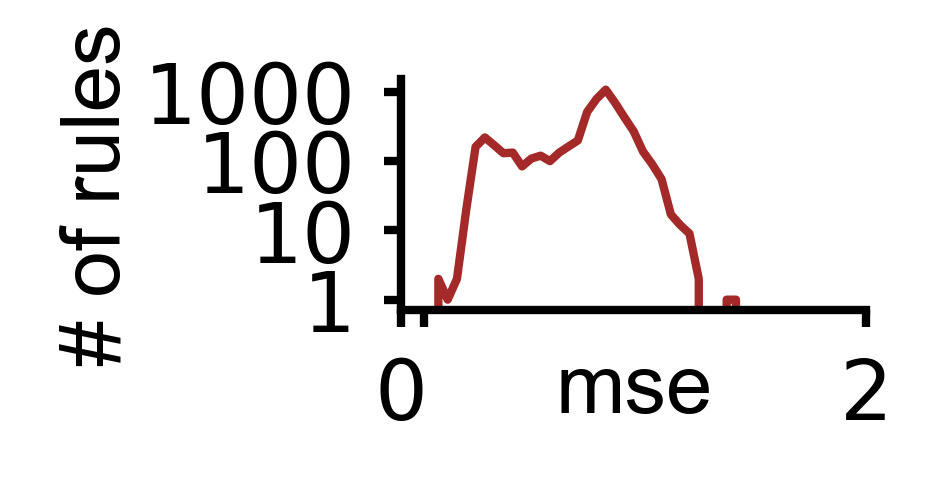

Number of rules with mse < 0.1: 0, 0.00 % of total


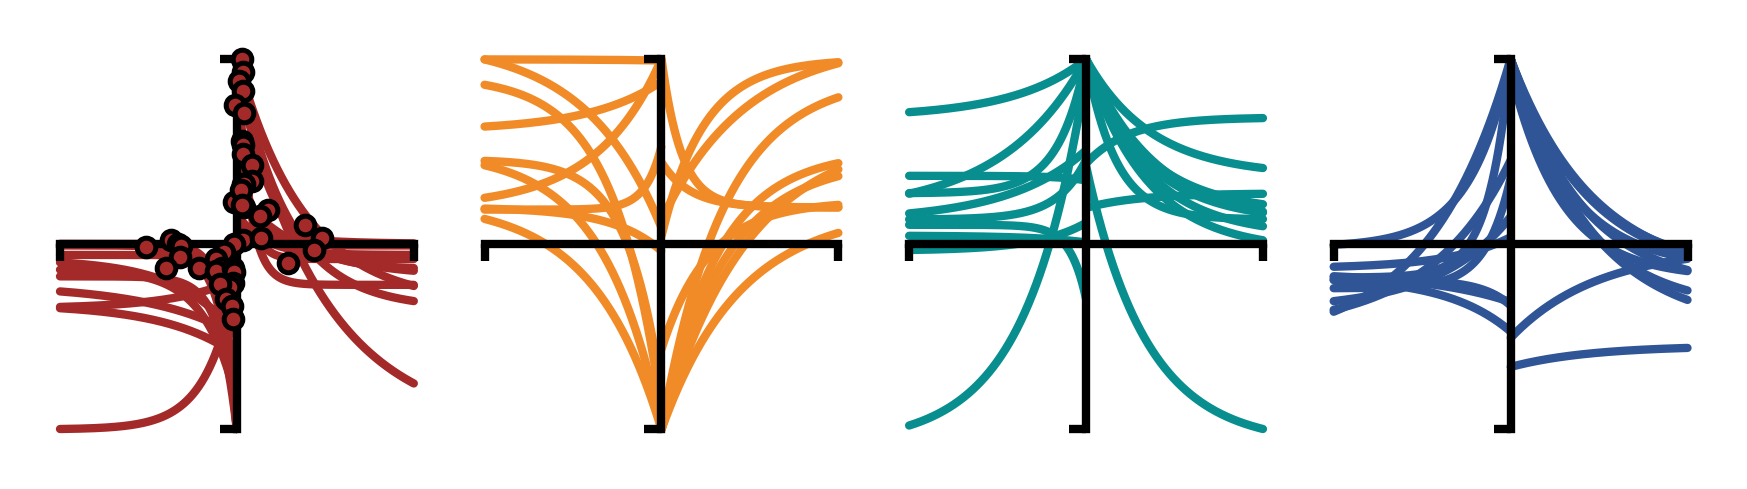

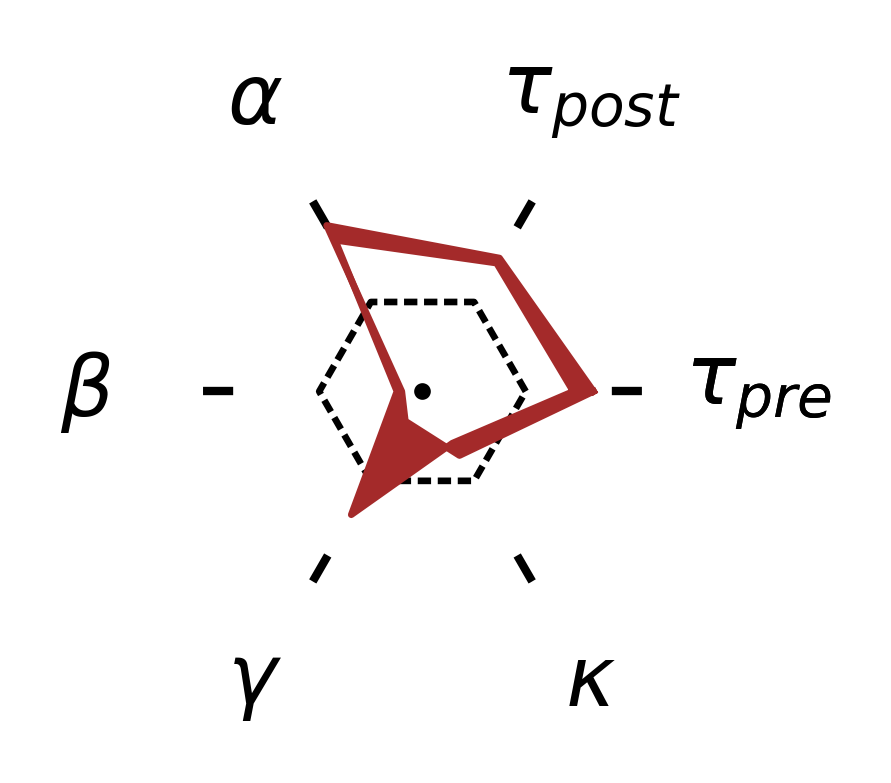

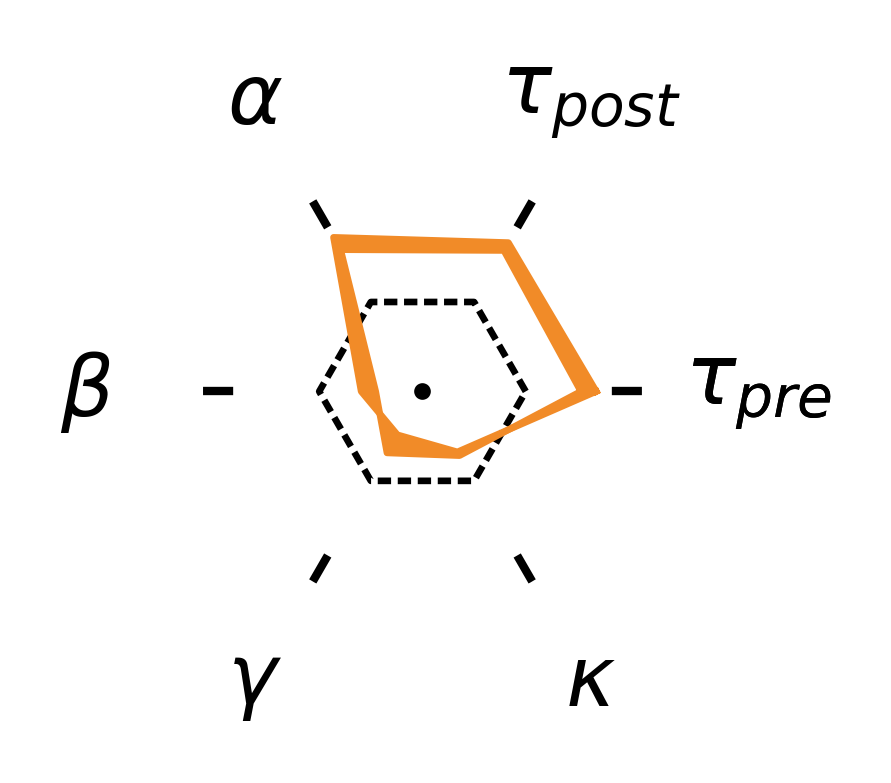

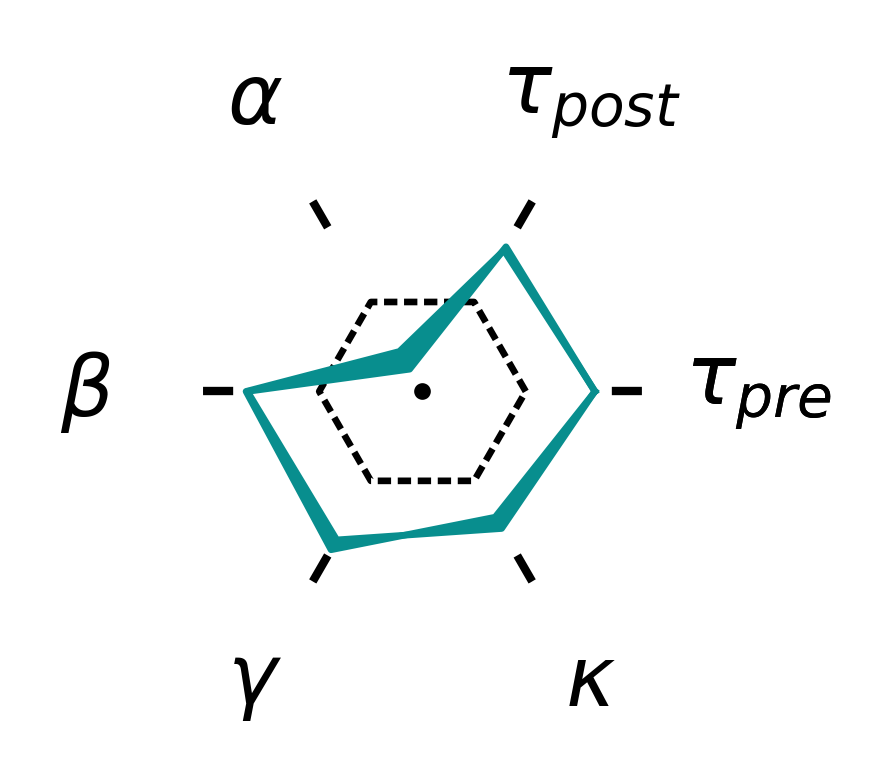

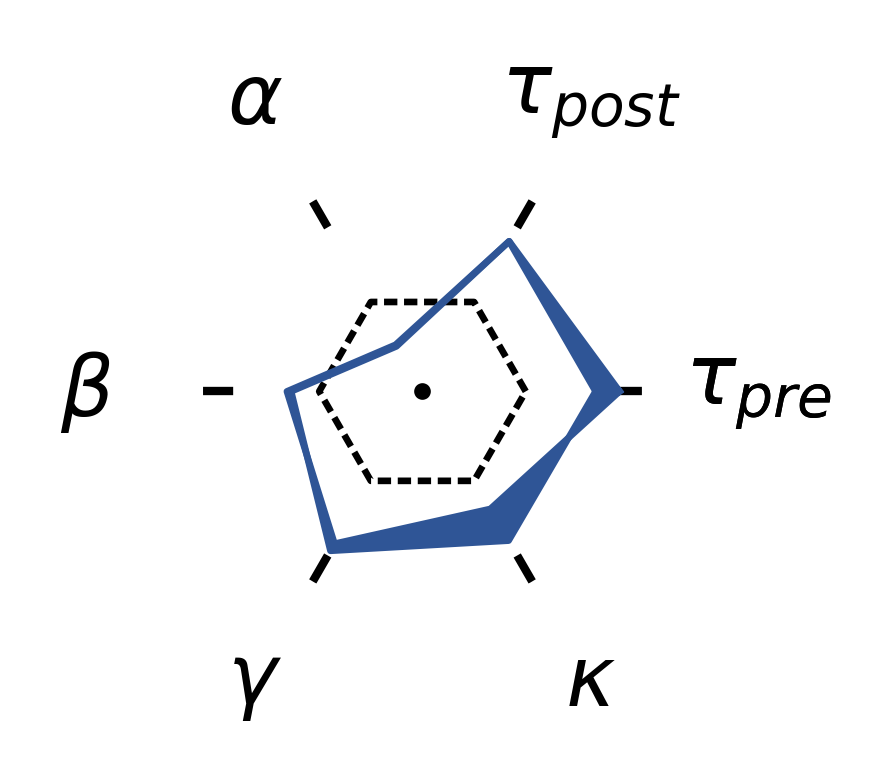

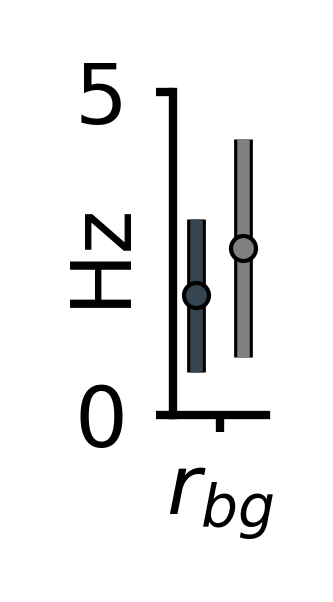

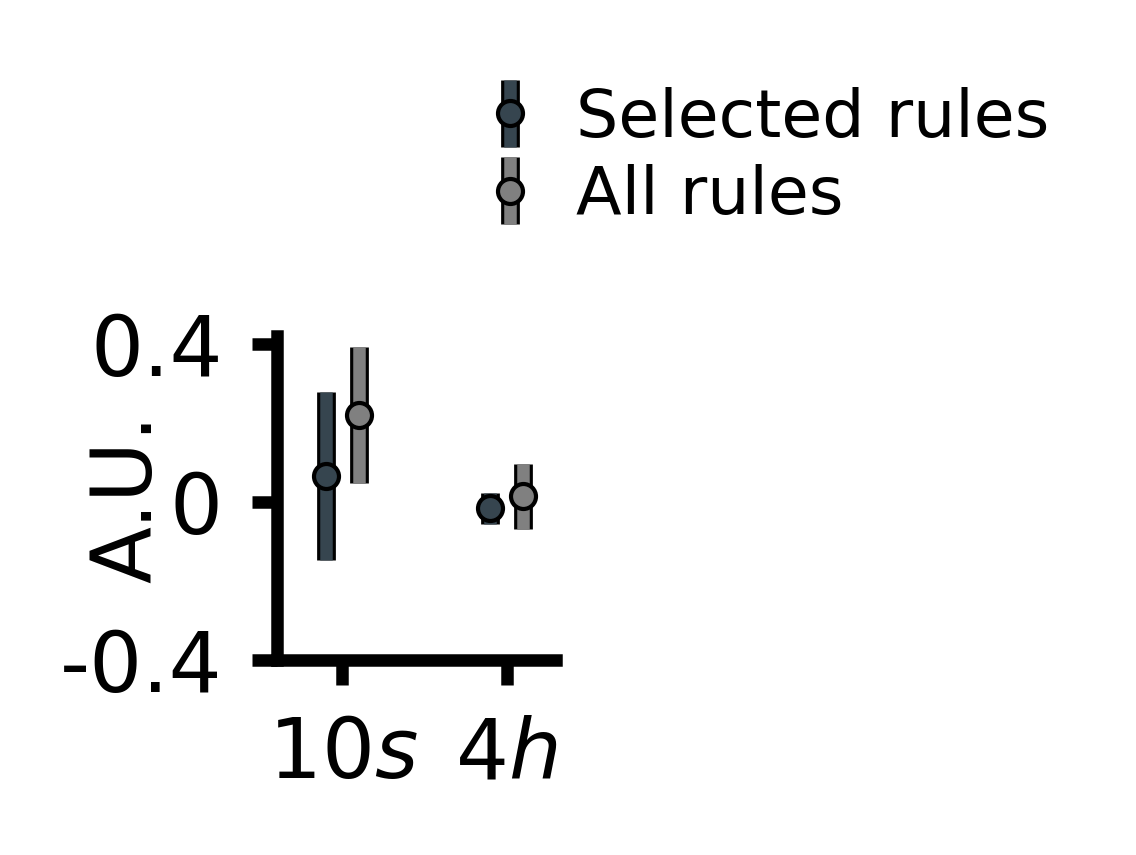

In [15]:
mse = np.zeros(n_rules)
for rule_num in range(n_rules):
    rule = d[rule_num]['theta']
    dws = aux.get_dw(rule[0:6], dt_values=bipoo_x*1e-3)
    dws = dws/np.max(np.abs(dws))
    
    # compute mse:
    mse[rule_num] = np.sum((dws - bipoo_ynorm)**2)/len(bipoo_ynorm)


aux.plot_distance_distribution(
        data_1D=mse,
        n_bins=50, 
        range = range_plot,
        log_scale = True,
        x_lim = x_lim_plot,
        x_ticks = x_ticks_plot,
        x_ticklabels = x_ticklabels_plot,
        x_label='mse',
        labelpad_xlabel=-10,
        y_lim=None,
        y_ticks=[1,10,100,1000],
        y_ticklabels=[1,10,100,1000],
        y_label='# of rules', 
        figsize=(1,0.5),
        linewidth=1,
        title=None,
        fontsize=10,
        font="arial",
        color=aux.color_ee,
        rotation=0,
        dpi=600)

sorted_inds = np.argsort(mse)
# find all the rules with mse < cutoff
n_good_rules = 0
while mse[sorted_inds[n_good_rules]] < cutoff and n_good_rules < n_rules:
    n_good_rules += 1
print(f"Number of rules with mse < {cutoff}: {n_good_rules}, {n_good_rules/n_rules*100:.2f} % of total")

best_rules = d[sorted_inds[:10]]['theta']
aux.plot_4_rules_wData(best_rules[:,:-1],
                   x_datapoints = bipoo_x*1e-3,
                   y_datapoints = bipoo_ynorm,
                   markersize_datapoints = 20,
                   linewidth_data_marker=0.6,
                   ind_plot_datapoint = 0,
                   linewidth=1,
                   axwidth=1,
                   figsize=(3.5,0.8),
                   dpi=600,
                   color_data=aux.color_ee,
                   x_ticks=[-0.2,0.2],
                   x_ticklabels=['',''],
                   y_ticks=[-1,1],
                   y_ticklabels=['',''],
                   fontsize=10)

aux.plot_4spider_plots(d, sorted_inds)

aux.plot_rbg_comparison(d, n_good_rules, sorted_inds)

aux.plot_drmem_comparison(dr, n_good_rules, sorted_inds)

#### Comparison with Bell dataset

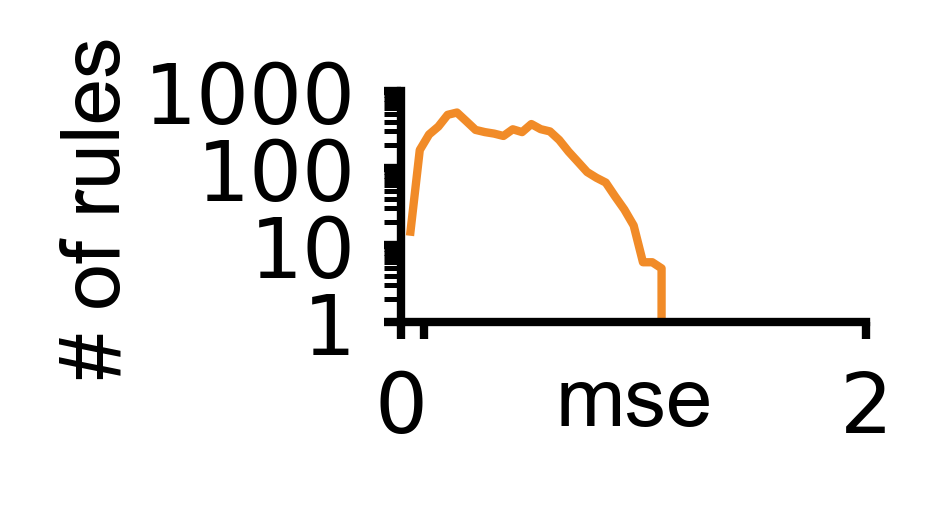

Number of rules with mse < 0.1: 312, 5.33 % of total


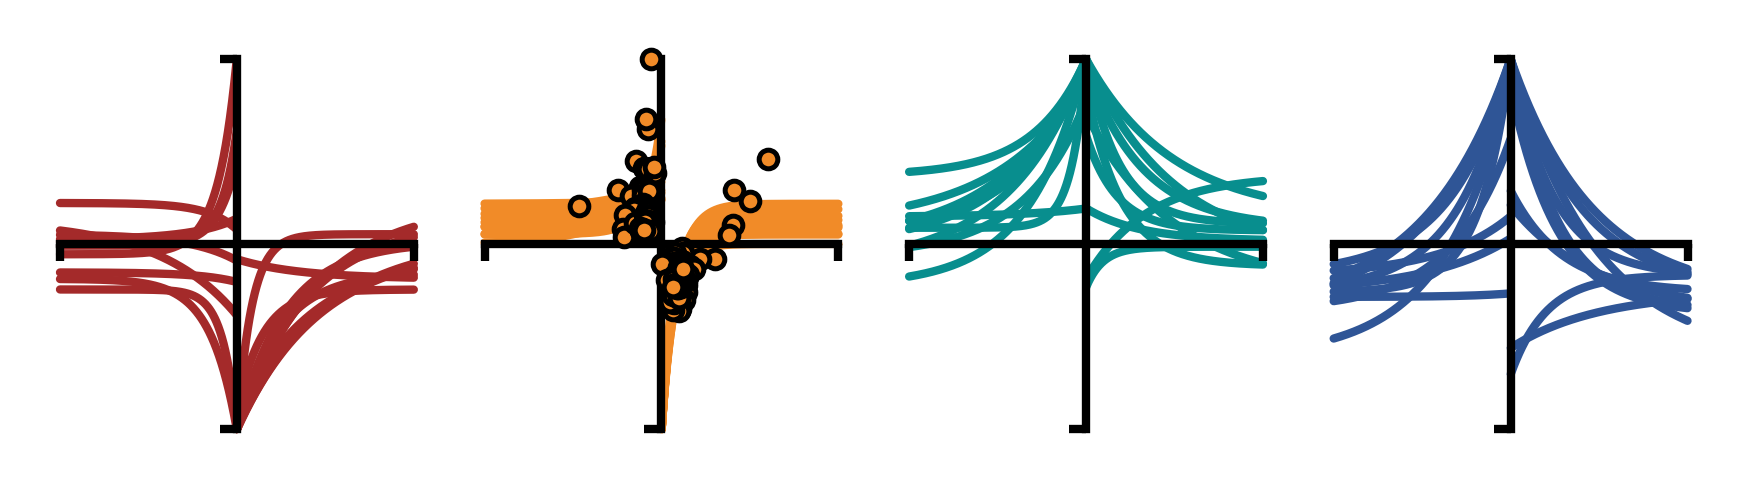

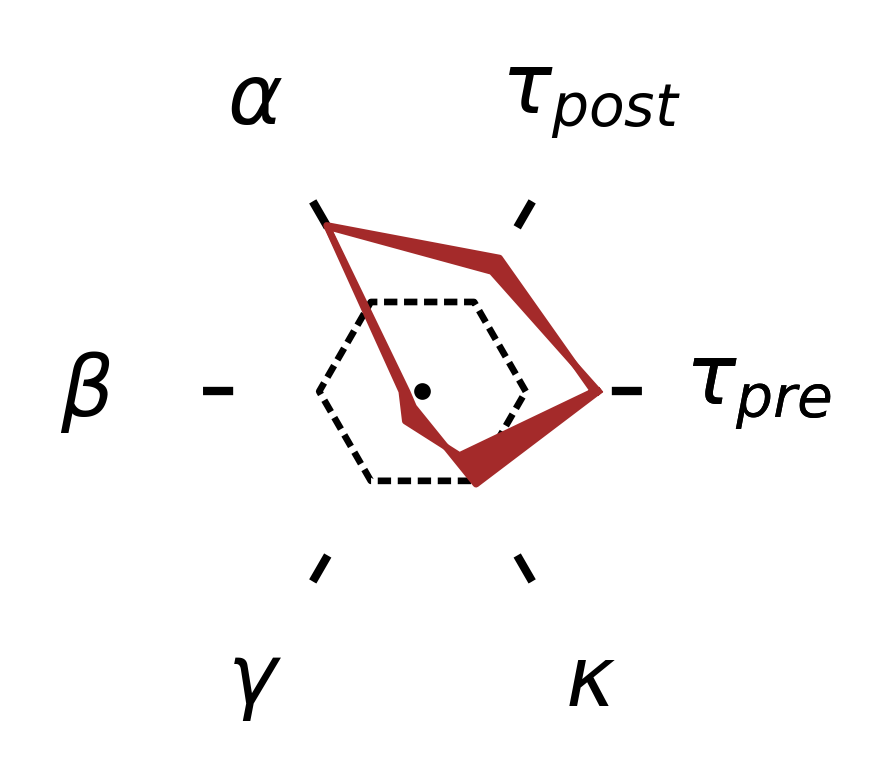

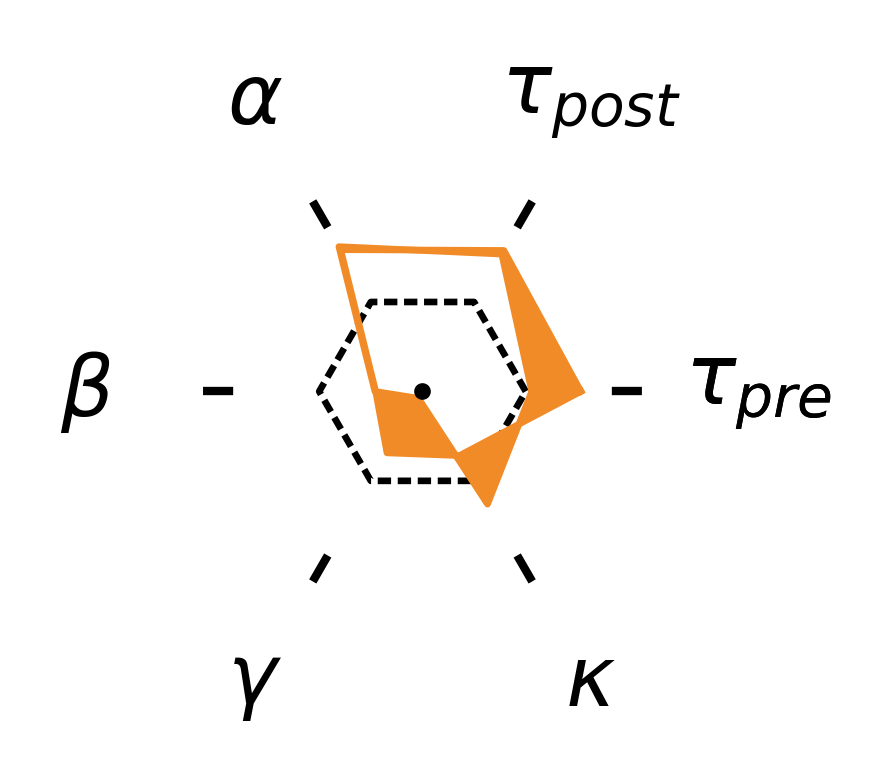

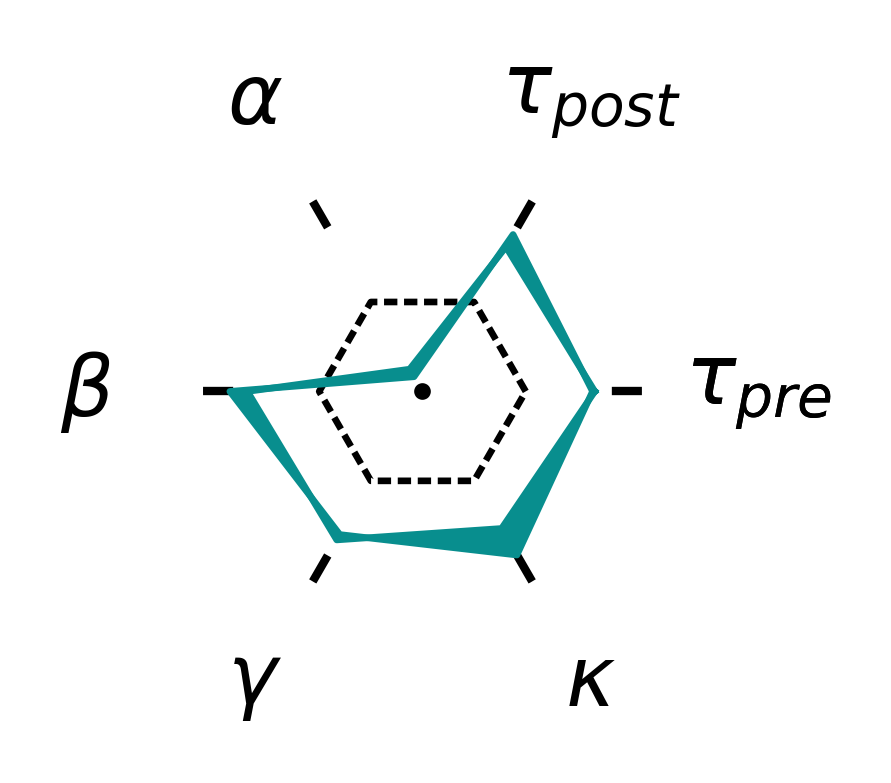

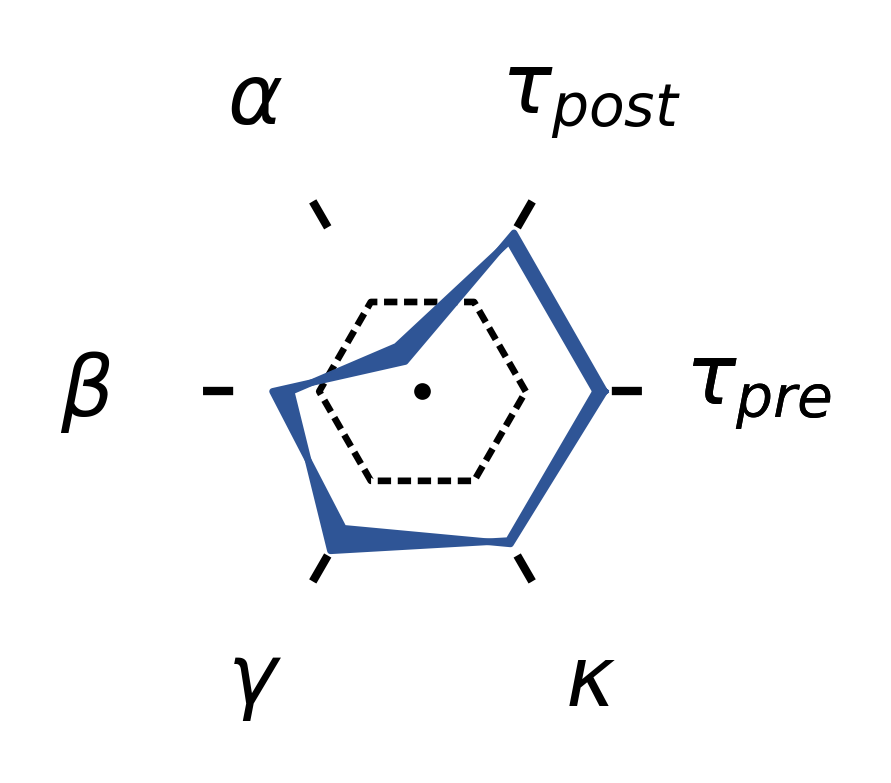

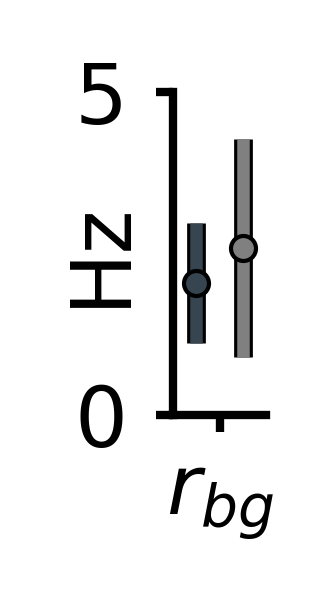

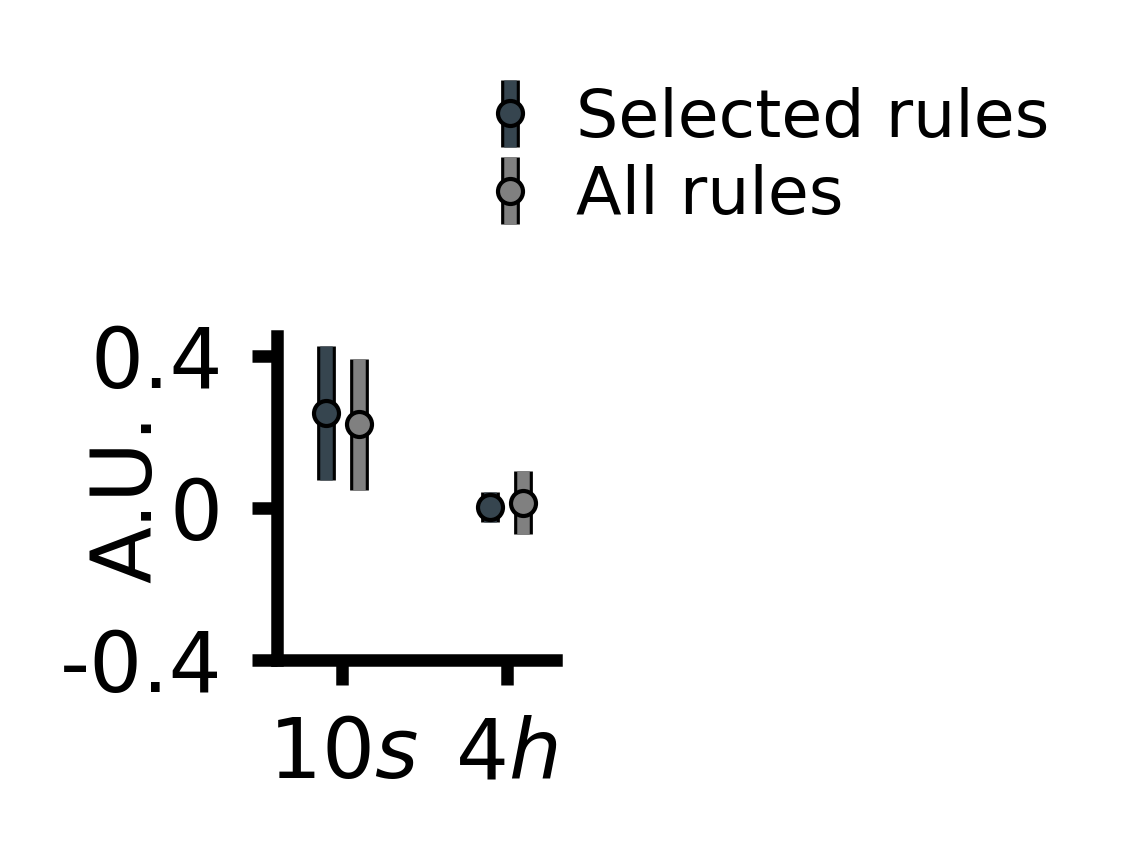

In [16]:
mse = np.zeros(n_rules)
for rule_num in range(n_rules):
    rule = d[rule_num]['theta']
    dws = aux.get_dw(rule[6:12], dt_values=bell_x*1e-3)
    dws = dws/np.max(np.abs(dws))
    
    # compute mse:
    mse[rule_num] = np.sum((dws - bell_ynorm)**2)/len(bell_ynorm)

aux.plot_distance_distribution(
        data_1D=mse,
        n_bins=50, 
        range = range_plot,
        log_scale = True,
        x_lim = x_lim_plot,
        x_ticks = x_ticks_plot,
        x_ticklabels = x_ticklabels_plot,
        x_label='mse',
        labelpad_xlabel=-10,
        y_lim=None,
        y_ticks=[1,10,100,1000],
        y_ticklabels=[1,10,100,1000],
        y_label='# of rules', 
        figsize=(1,0.5),
        linewidth=1,
        title=None,
        fontsize=10,
        font="arial",
        color=aux.color_ei,
        rotation=0,
        dpi=600)

sorted_inds = np.argsort(mse)
n_good_rules = 0
while mse[sorted_inds[n_good_rules]] < cutoff and n_good_rules < n_rules:
    n_good_rules += 1
print(f"Number of rules with mse < {cutoff}: {n_good_rules}, {n_good_rules/n_rules*100:.2f} % of total")
best_rules = d[sorted_inds[:10]]['theta']
aux.plot_4_rules_wData(best_rules[:,:-1],
                   x_datapoints = bell_x*1e-3,
                   y_datapoints = bell_ynorm,
                   markersize_datapoints = 20,
                   linewidth_data_marker=0.6,
                   ind_plot_datapoint = 1,
                   linewidth=1,
                   axwidth=1,
                   figsize=(3.5,0.8),
                   dpi=600,
                   color_data=aux.color_ei,
                   x_ticks=[-0.2,0.2],
                   x_ticklabels=['',''],
                   y_ticks=[-1,1],
                   y_ticklabels=['',''],
                   fontsize=10)

aux.plot_4spider_plots(d, sorted_inds)

aux.plot_rbg_comparison(d, n_good_rules, sorted_inds)

aux.plot_drmem_comparison(dr, n_good_rules, sorted_inds)

#### Comparison with Froemke data

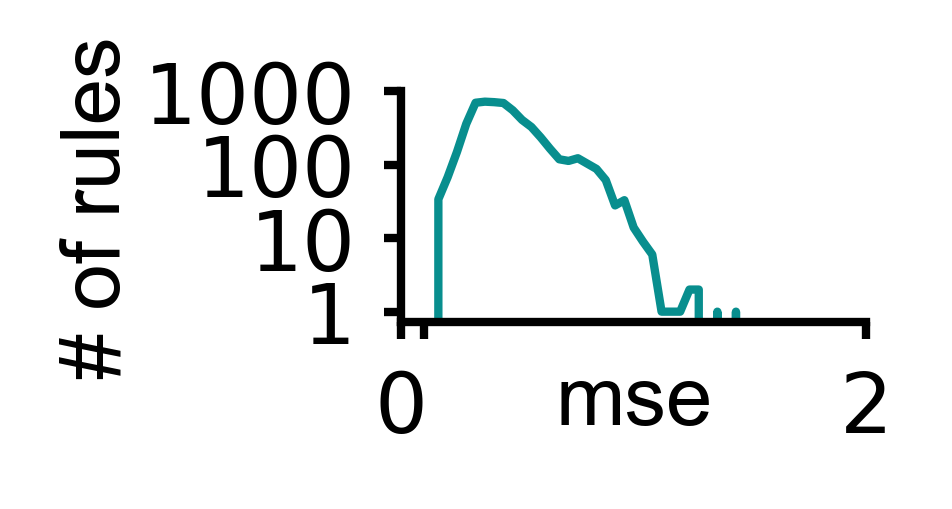

Number of rules with mse < 0.1: 0, 0.00 % of total


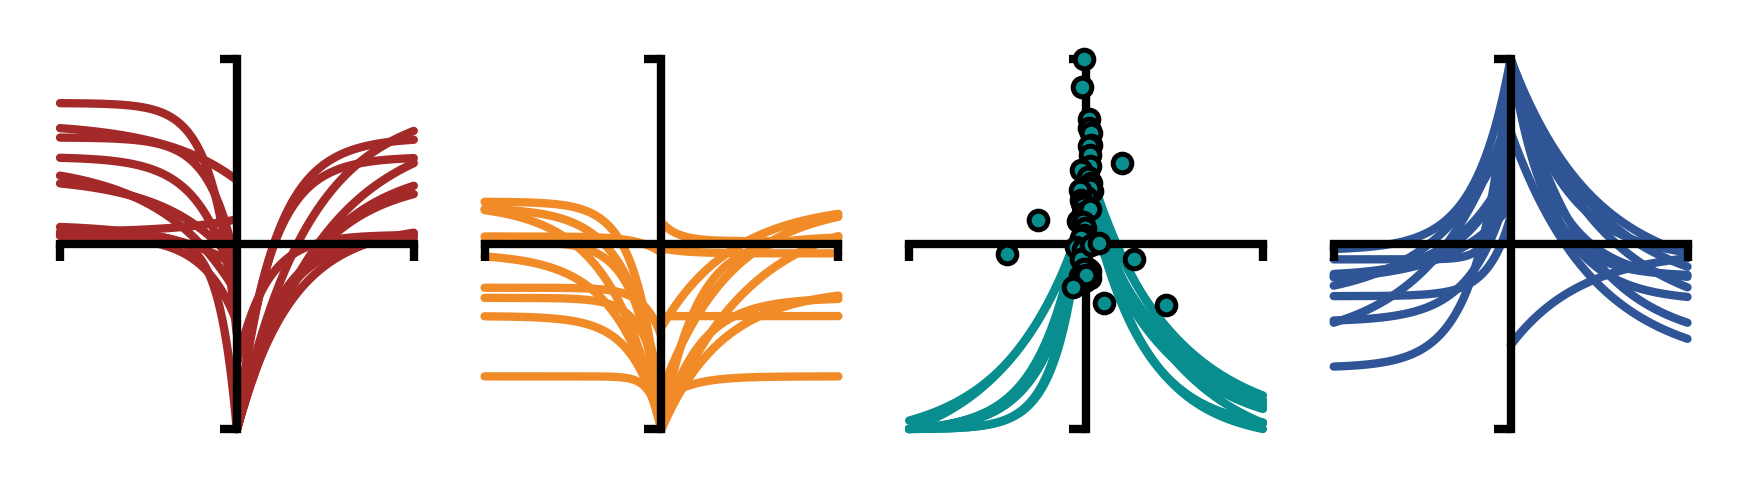

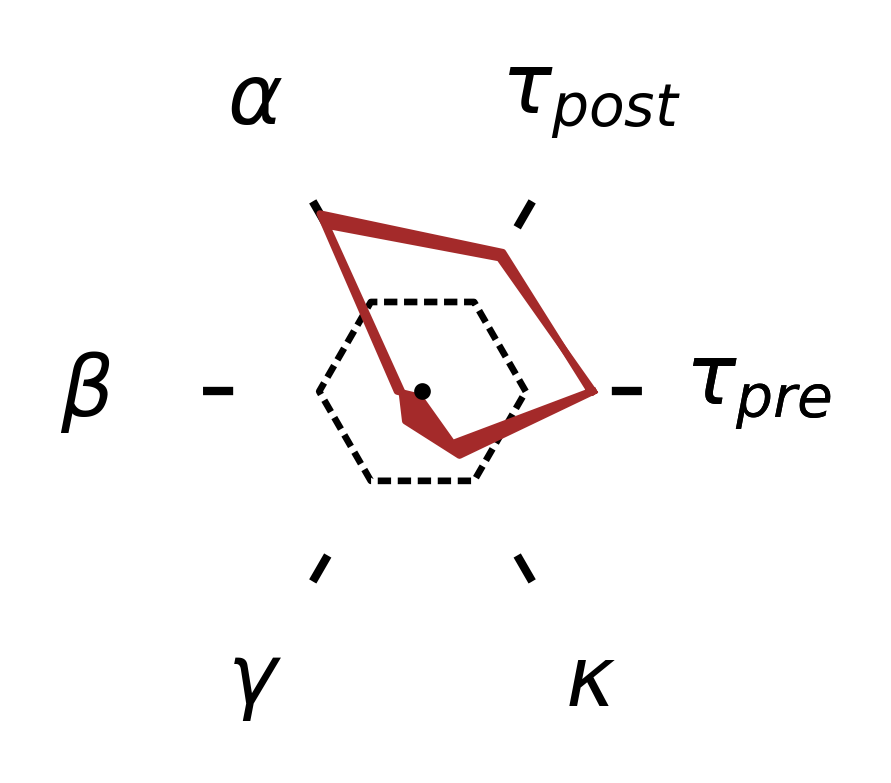

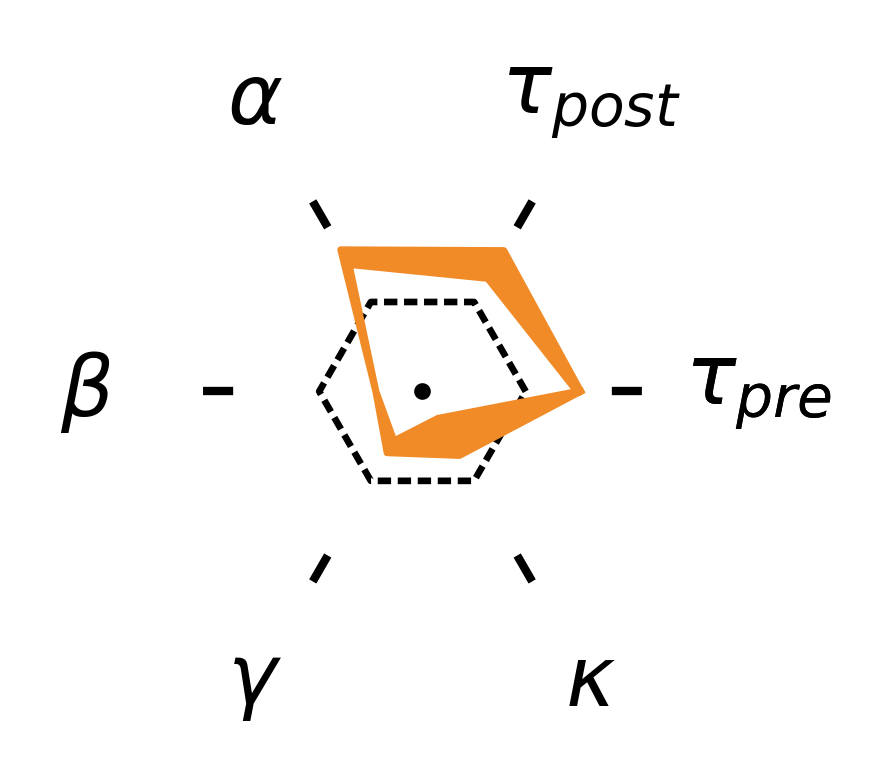

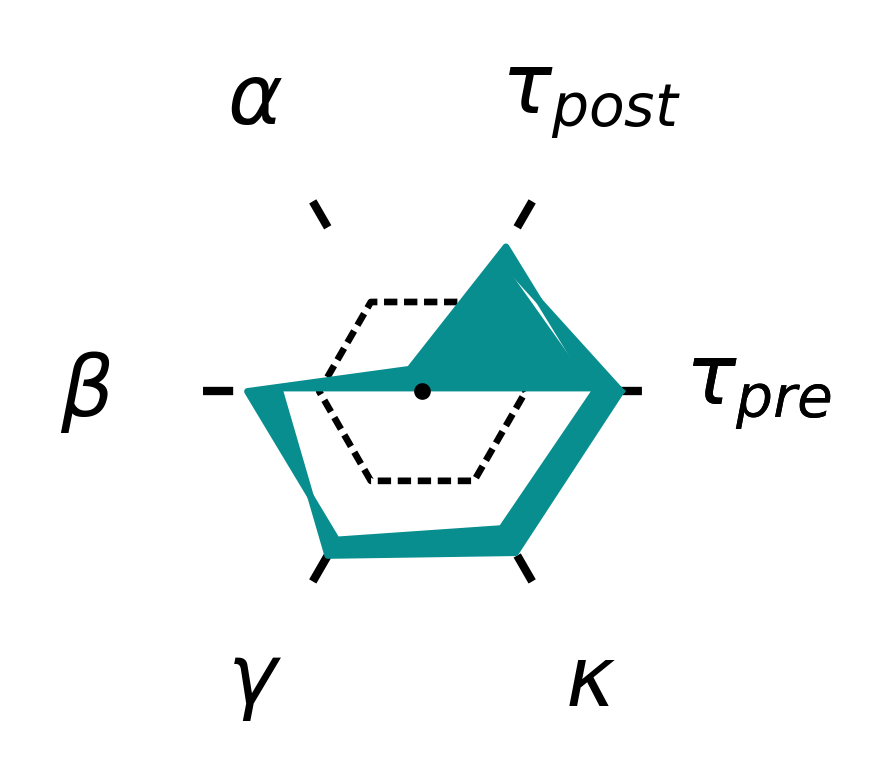

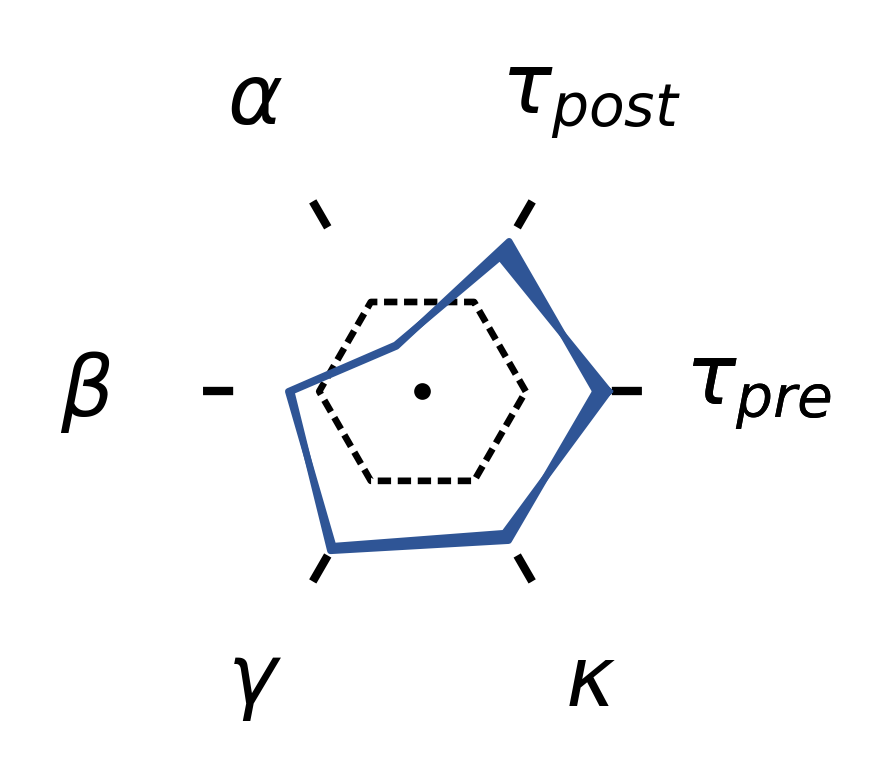

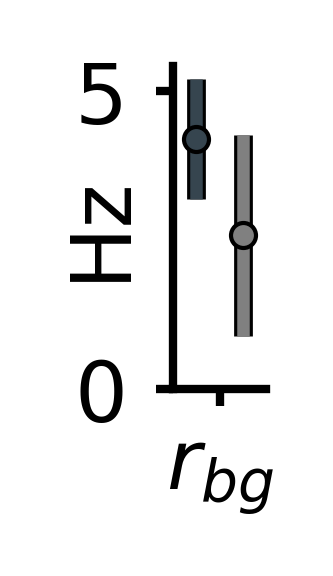

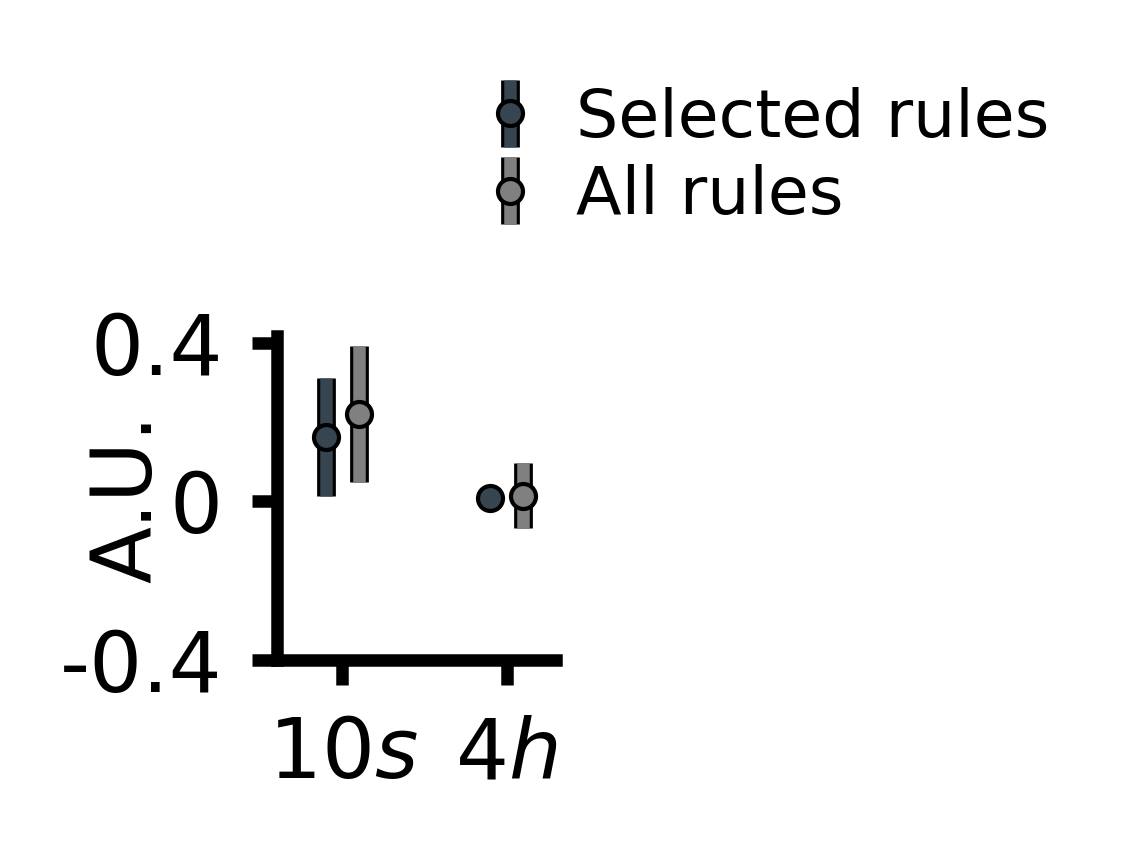

In [17]:
mse = np.zeros(n_rules)
for rule_num in range(n_rules):
    rule = d[rule_num]['theta']
    dws = aux.get_dw(rule[12:18], dt_values=froemke_x*1e-3)
    dws = dws/np.max(np.abs(dws))
    
    # compute mse:
    mse[rule_num] = np.sum((dws - froemke_ynorm)**2)/len(froemke_ynorm)

aux.plot_distance_distribution(
        data_1D=mse,
        n_bins=50, 
        range = range_plot,
        log_scale = True,
        x_lim = x_lim_plot,
        x_ticks = x_ticks_plot,
        x_ticklabels = x_ticklabels_plot,
        x_label='mse',
        labelpad_xlabel=-10,
        y_lim=None,
        y_ticks=[1,10,100,1000],
        y_ticklabels=[1,10,100,1000],
        y_label='# of rules', 
        figsize=(1,0.5),
        linewidth=1,
        title=None,
        fontsize=10,
        font="arial",
        color=aux.color_ie,
        rotation=0,
        dpi=600)

sorted_inds = np.argsort(mse)
n_good_rules = 0
while mse[sorted_inds[n_good_rules]] < cutoff and n_good_rules < n_rules:
    n_good_rules += 1
print(f"Number of rules with mse < {cutoff}: {n_good_rules}, {n_good_rules/n_rules*100:.2f} % of total")
best_rules = d[sorted_inds[:10]]['theta']
aux.plot_4_rules_wData(best_rules[:,:-1],
                   x_datapoints = froemke_x*1e-3,
                   y_datapoints = froemke_ynorm,
                   markersize_datapoints = 20,
                   linewidth_data_marker=0.6,
                   ind_plot_datapoint = 2,
                   linewidth=1,
                   axwidth=1,
                   figsize=(3.5,0.8),
                   dpi=600,
                   color_data=aux.color_ie,
                   x_ticks=[-0.2,0.2],
                   x_ticklabels=['',''],
                   y_ticks=[-1,1],
                   y_ticklabels=['',''],
                   fontsize=10)

aux.plot_4spider_plots(d, sorted_inds)

aux.plot_rbg_comparison(d, n_good_rules, sorted_inds)

aux.plot_drmem_comparison(dr, n_good_rules, sorted_inds)

#### Comparison with Oswald PV data

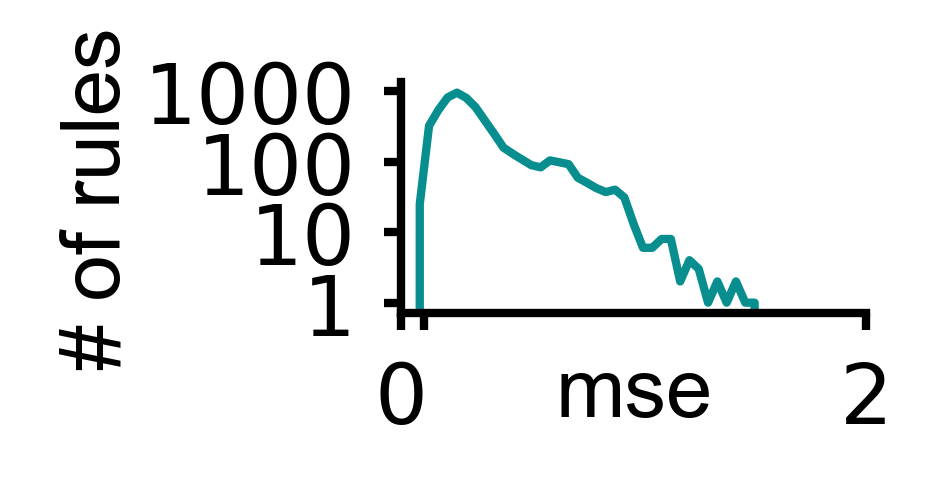

Number of rules with mse < 0.1: 155, 2.65 % of total


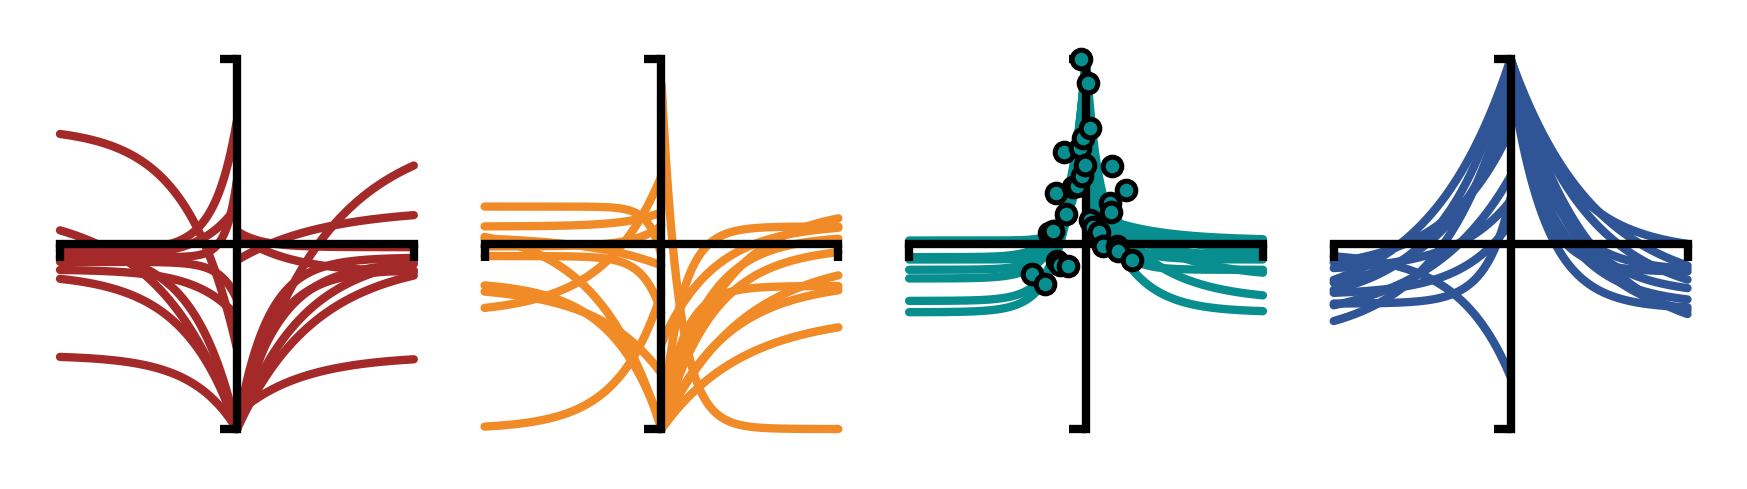

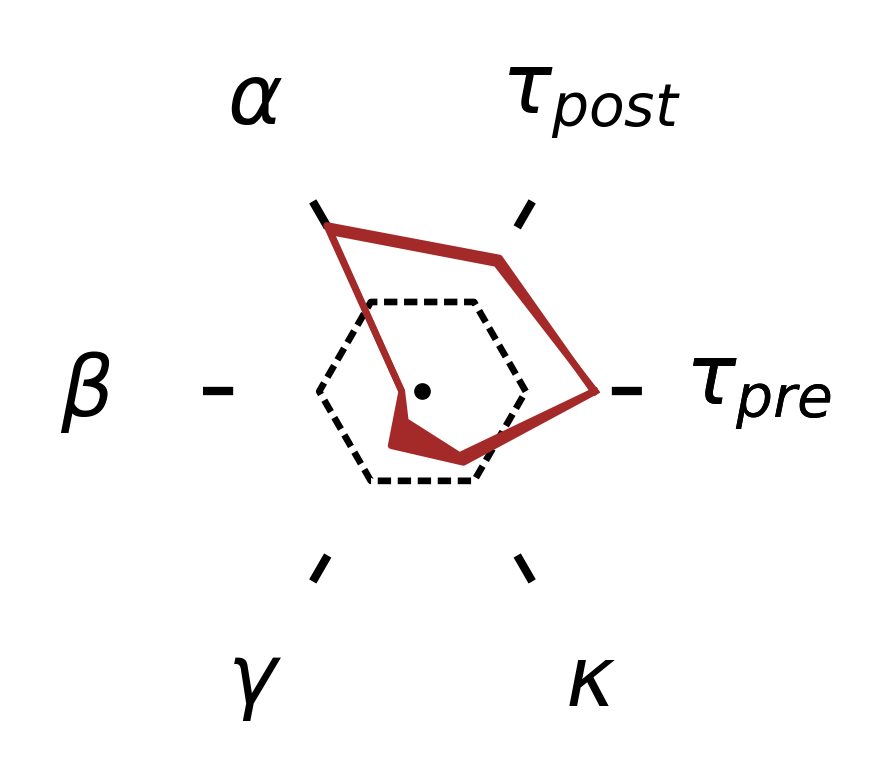

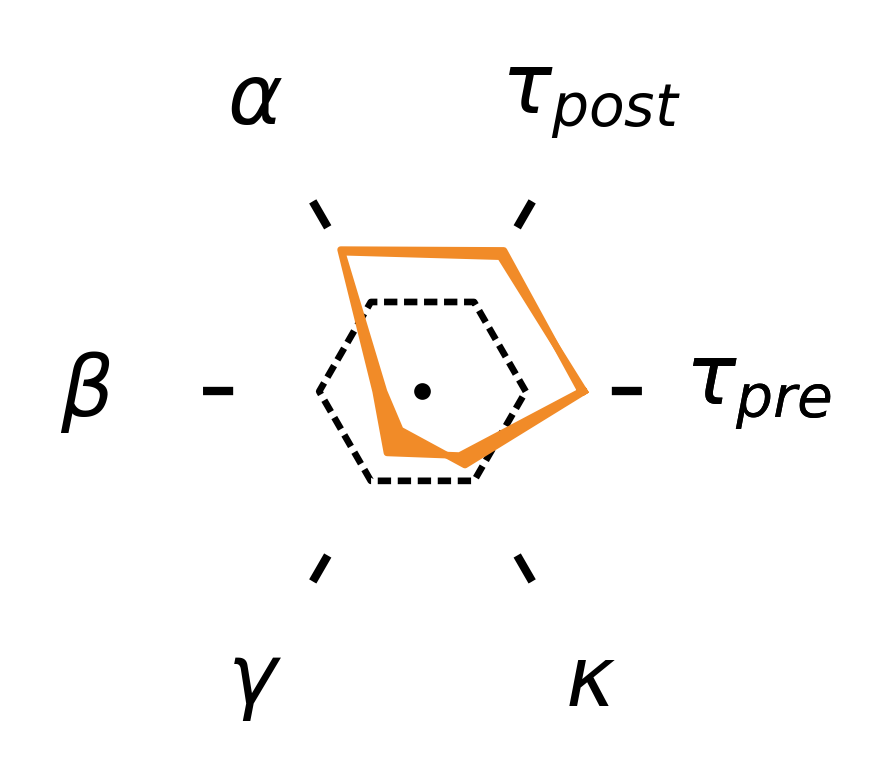

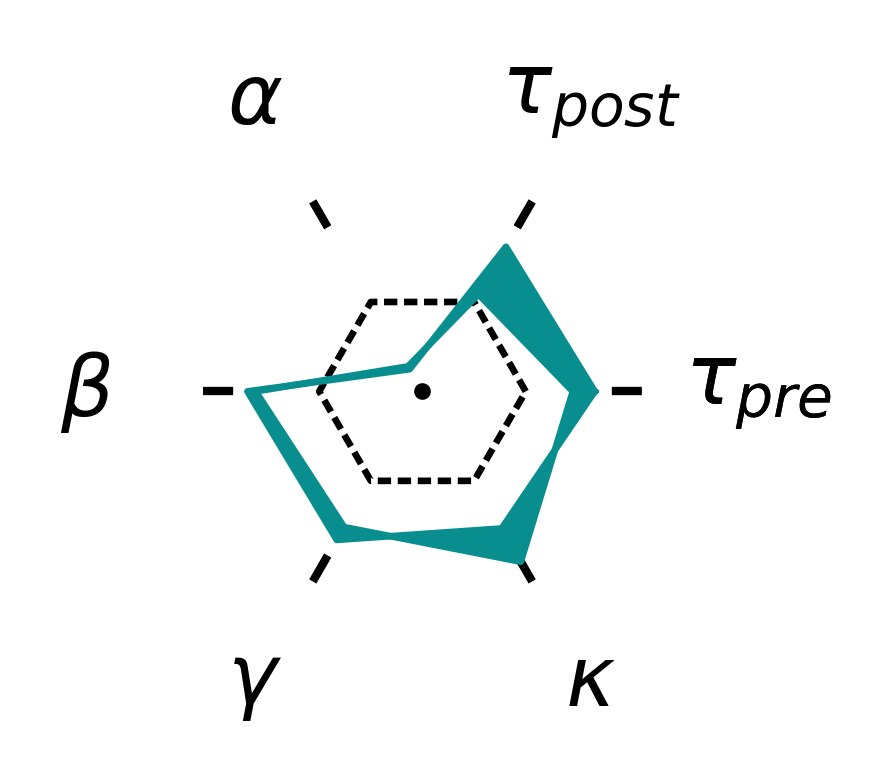

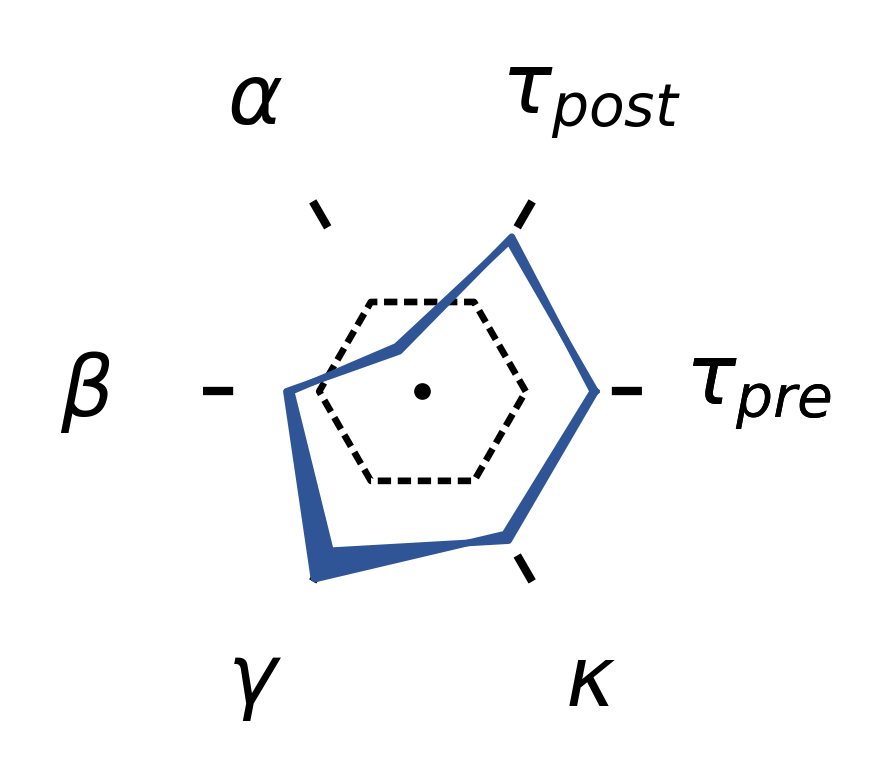

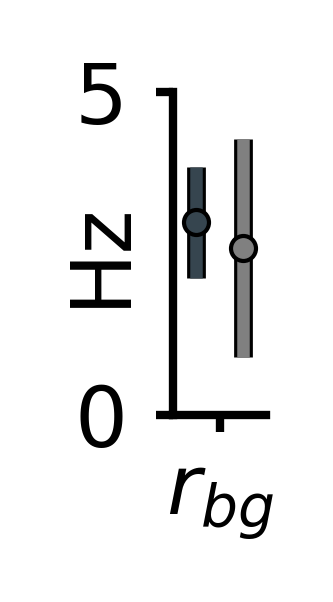

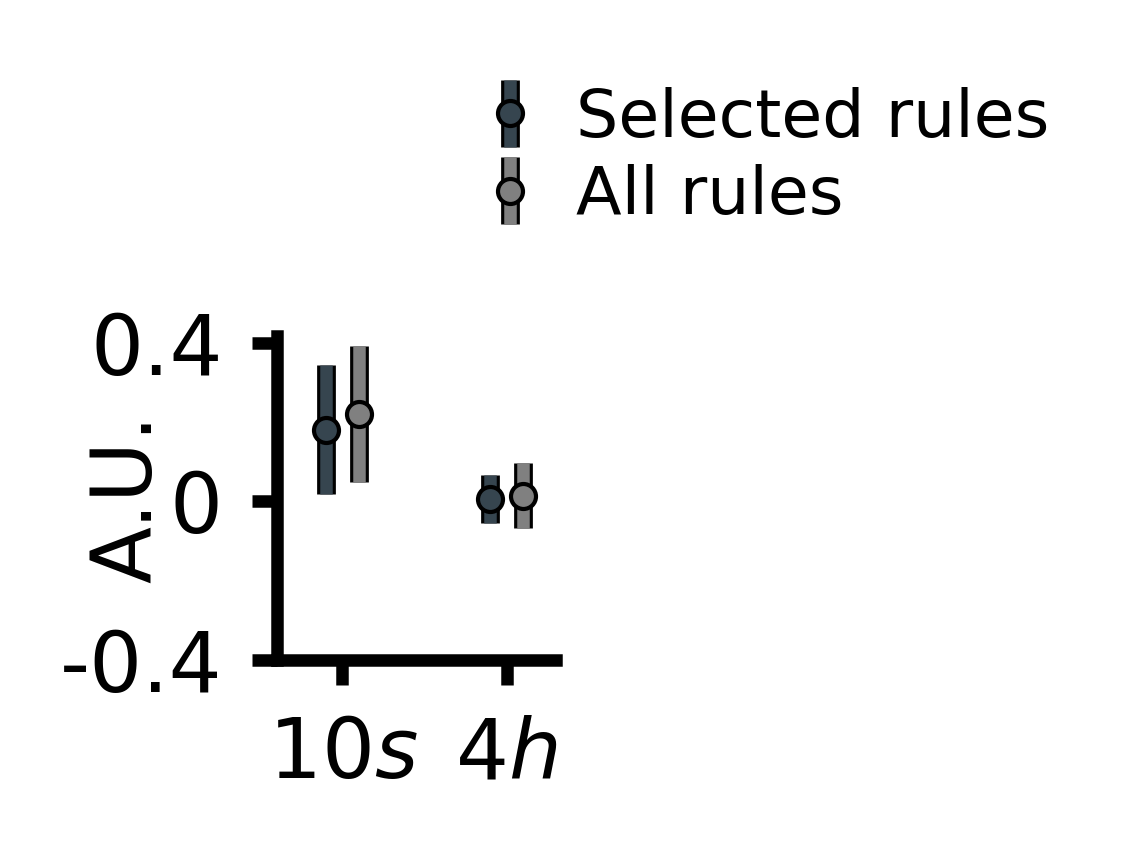

In [18]:
mse = np.zeros(n_rules)
for rule_num in range(n_rules):
    rule = d[rule_num]['theta']
    dws = aux.get_dw(rule[12:18], dt_values=oswaldPV_x*1e-3)
    dws = dws/np.max(np.abs(dws))
    
    # compute mse:
    mse[rule_num] = np.sum((dws - oswaldPV_ynorm)**2)/len(oswaldPV_ynorm)


aux.plot_distance_distribution(
        data_1D=mse,
        n_bins=50, 
        range = range_plot,
        log_scale = True,
        x_lim = x_lim_plot,
        x_ticks = x_ticks_plot,
        x_ticklabels = x_ticklabels_plot,
        x_label='mse',
        labelpad_xlabel=-10,
        y_lim=None,
        y_ticks=[1,10,100,1000],
        y_ticklabels=[1,10,100,1000],
        y_label='# of rules', 
        figsize=(1,0.5),
        linewidth=1,
        title=None,
        fontsize=10,
        font="arial",
        color=aux.color_ie,
        rotation=0,
        dpi=600)

sorted_inds = np.argsort(mse)
n_good_rules = 0
while mse[sorted_inds[n_good_rules]] < cutoff and n_good_rules < n_rules:
    n_good_rules += 1
print(f"Number of rules with mse < {cutoff}: {n_good_rules}, {n_good_rules/n_rules*100:.2f} % of total")
best_rules = d[sorted_inds[:10]]['theta']
aux.plot_4_rules_wData(best_rules[:,:-1],
                   x_datapoints = oswaldPV_x*1e-3,
                   y_datapoints = oswaldPV_ynorm,
                   markersize_datapoints = 20,
                   linewidth_data_marker=0.6,
                   ind_plot_datapoint = 2,
                   linewidth=1,
                   axwidth=1,
                   figsize=(3.5,0.8),
                   dpi=600,
                   color_data=aux.color_ie,
                   x_ticks=[-0.2,0.2],
                   x_ticklabels=['',''],
                   y_ticks=[-1,1],
                   y_ticklabels=['',''],
                   fontsize=10)

aux.plot_4spider_plots(d, sorted_inds)

aux.plot_rbg_comparison(d, n_good_rules, sorted_inds)

aux.plot_drmem_comparison(dr, n_good_rules, sorted_inds)

#### Comparison with Oswald SOM data

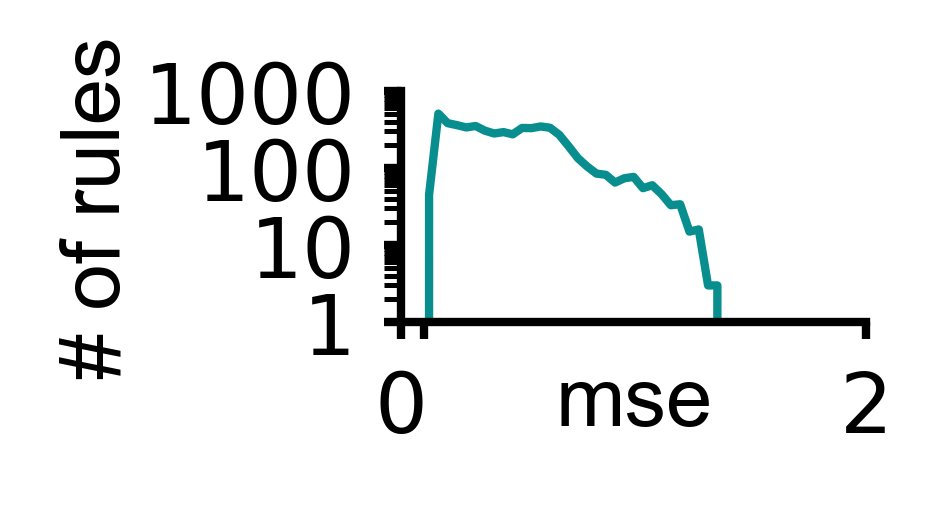

Number of rules with mse < 0.1: 449, 7.68 % of total


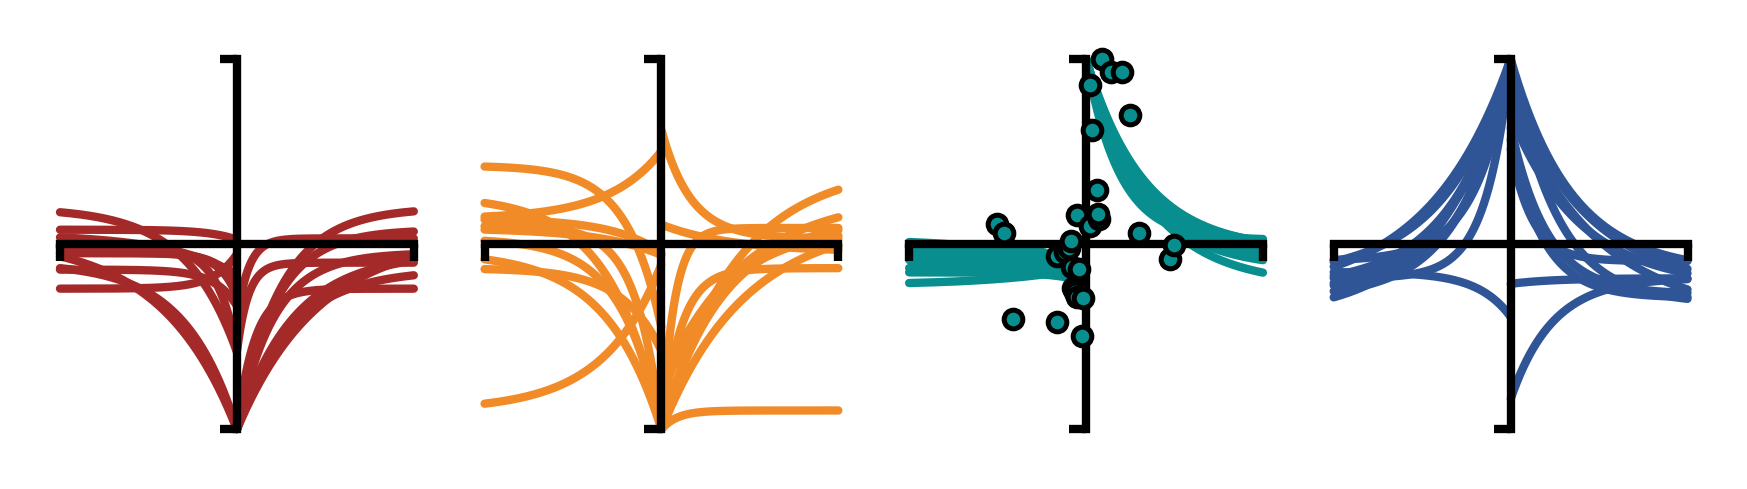

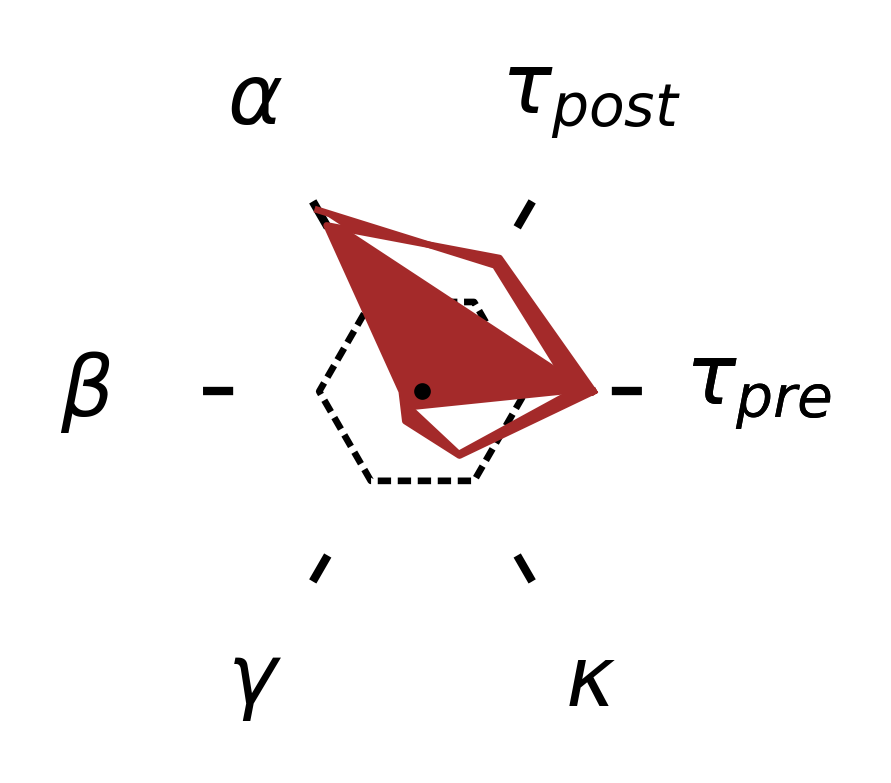

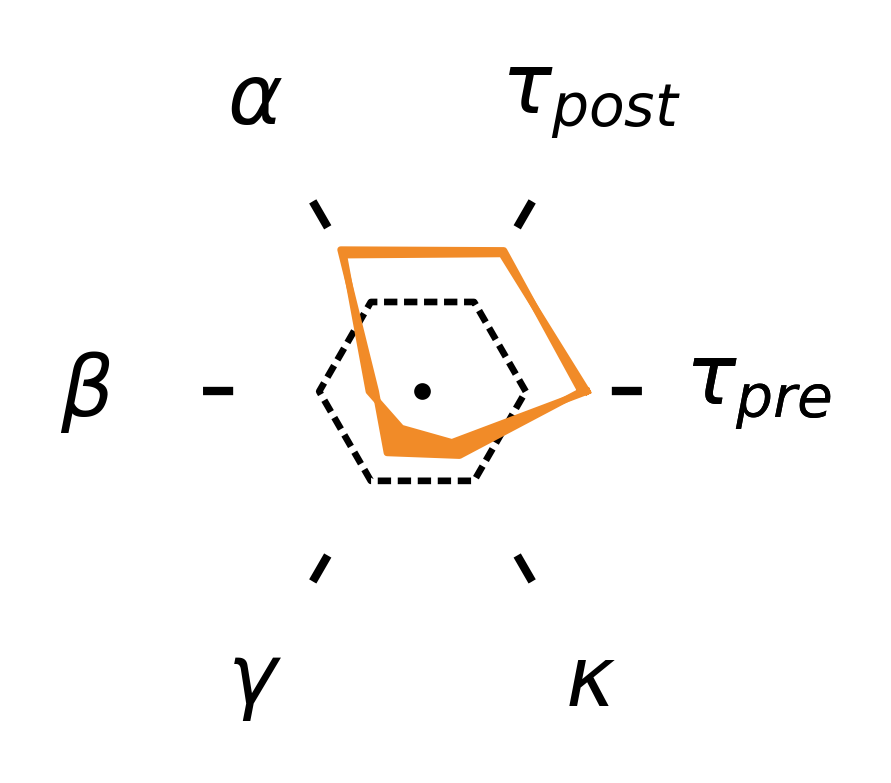

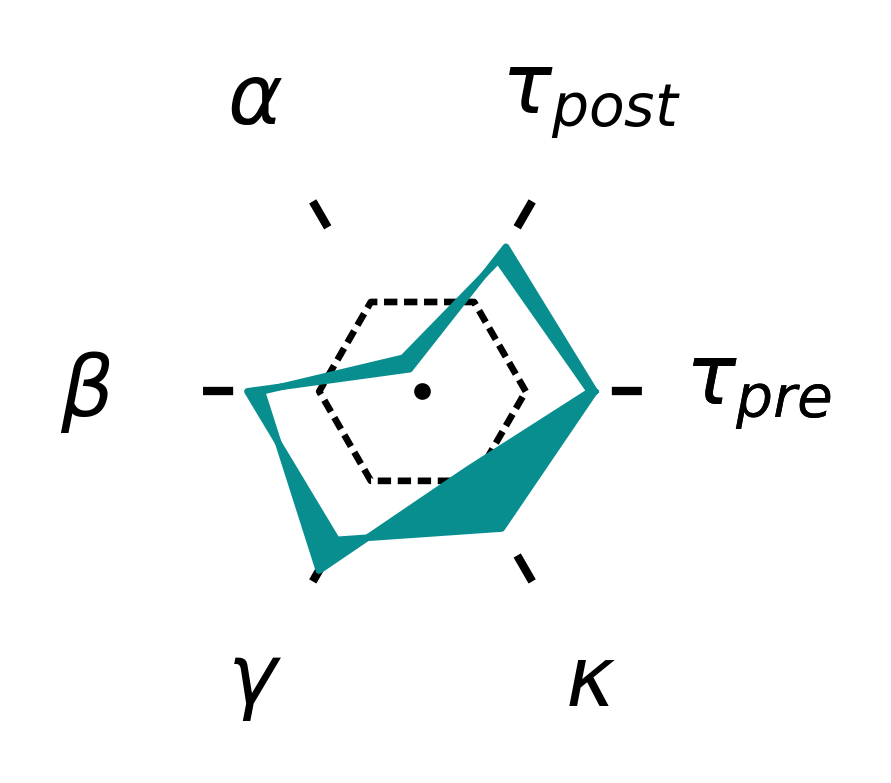

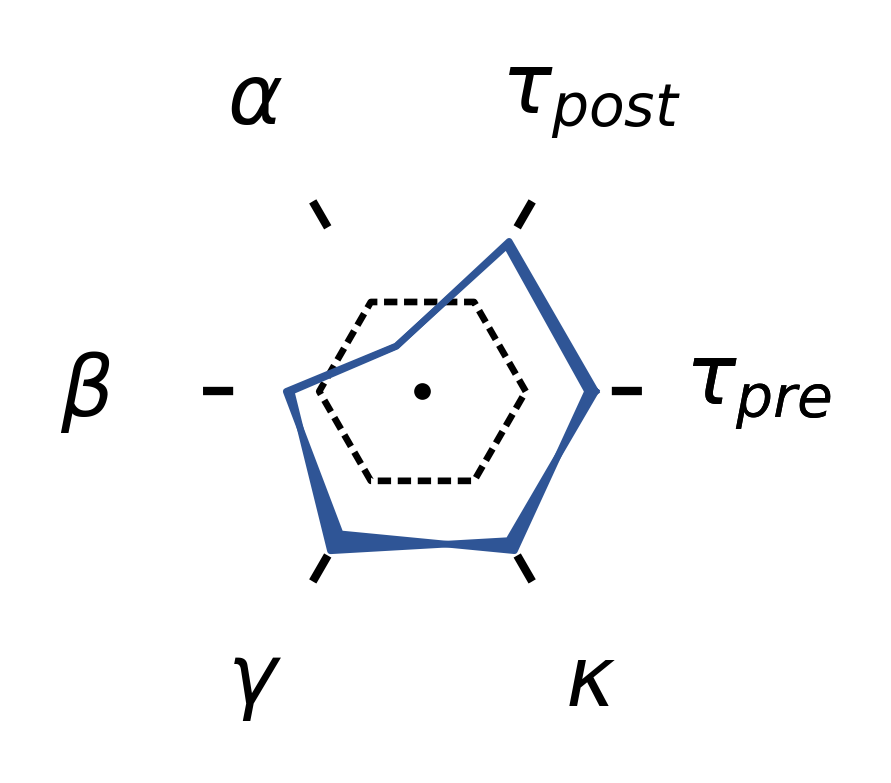

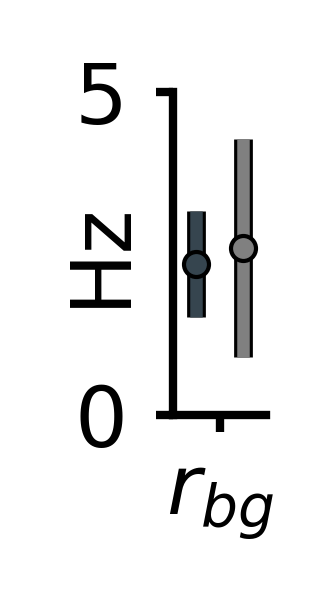

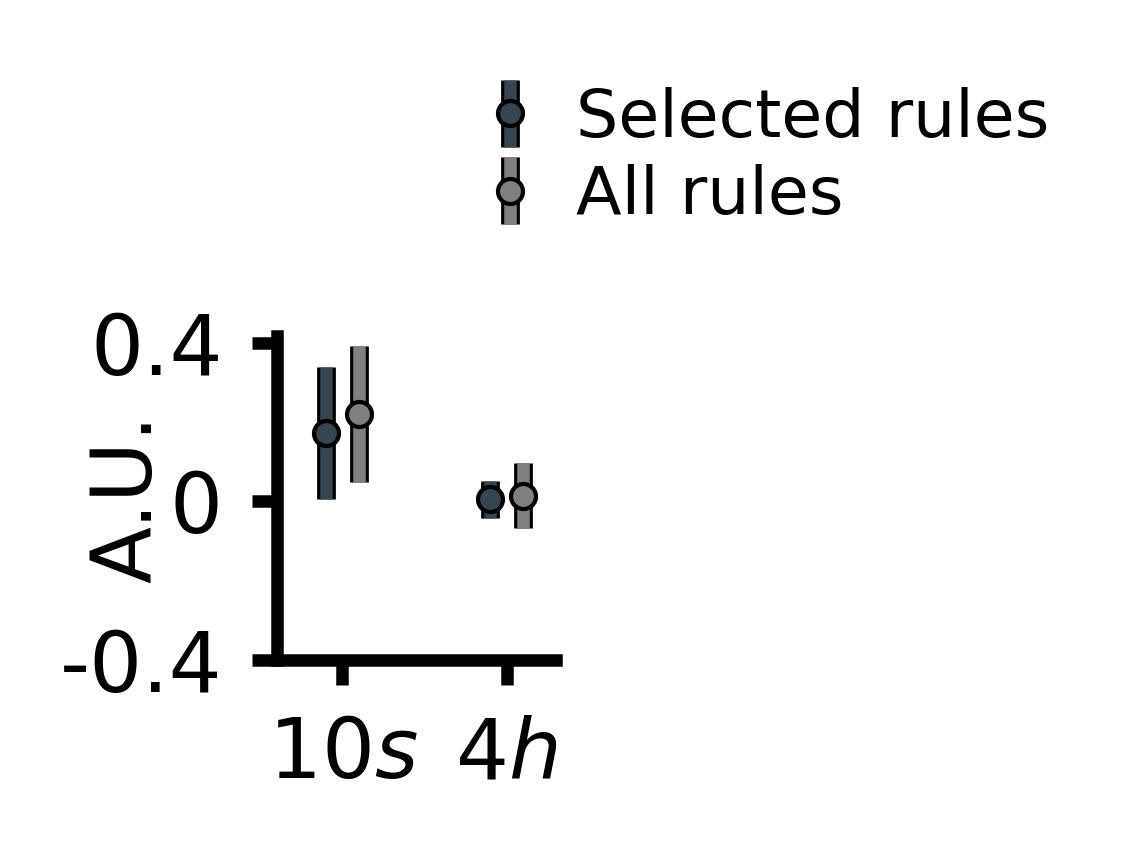

In [19]:
mse = np.zeros(n_rules)
for rule_num in range(n_rules):
    rule = d[rule_num]['theta']
    dws = aux.get_dw(rule[12:18], dt_values=oswaldSOM_x*1e-3)
    dws = dws/np.max(np.abs(dws))
    
    # compute mse:
    mse[rule_num] = np.sum((dws - oswaldSOM_ynorm)**2)/len(oswaldSOM_ynorm)

aux.plot_distance_distribution(
        data_1D=mse,
        n_bins=50, 
        range = range_plot,
        log_scale = True,
        x_lim = x_lim_plot,
        x_ticks = x_ticks_plot,
        x_ticklabels = x_ticklabels_plot,
        x_label='mse',
        labelpad_xlabel=-10,
        y_lim=None,
        y_ticks=[1,10,100,1000],
        y_ticklabels=[1,10,100,1000],
        y_label='# of rules', 
        figsize=(1,0.5),
        linewidth=1,
        title=None,
        fontsize=10,
        font="arial",
        color=aux.color_ie,
        rotation=0,
        dpi=600)

sorted_inds = np.argsort(mse)
n_good_rules = 0
while mse[sorted_inds[n_good_rules]] < 0.15 and n_good_rules < n_rules:
    n_good_rules += 1
print(f"Number of rules with mse < {cutoff}: {n_good_rules}, {n_good_rules/n_rules*100:.2f} % of total")
best_rules = d[sorted_inds[:10]]['theta']
aux.plot_4_rules_wData(best_rules[:,:-1],
                   x_datapoints = oswaldSOM_x*1e-3,
                   y_datapoints = oswaldSOM_ynorm,
                   markersize_datapoints = 20,
                   linewidth_data_marker=0.6,
                   ind_plot_datapoint = 2,
                   linewidth=1,
                   axwidth=1,
                   figsize=(3.5,0.8),
                   dpi=600,
                   color_data=aux.color_ie,
                   x_ticks=[-0.2,0.2],
                   x_ticklabels=['',''],
                   y_ticks=[-1,1],
                   y_ticklabels=['',''],
                   fontsize=10)

aux.plot_4spider_plots(d, sorted_inds)

aux.plot_rbg_comparison(d, n_good_rules, sorted_inds)

aux.plot_drmem_comparison(dr, n_good_rules, sorted_inds)

#### Comparison with Woodin data

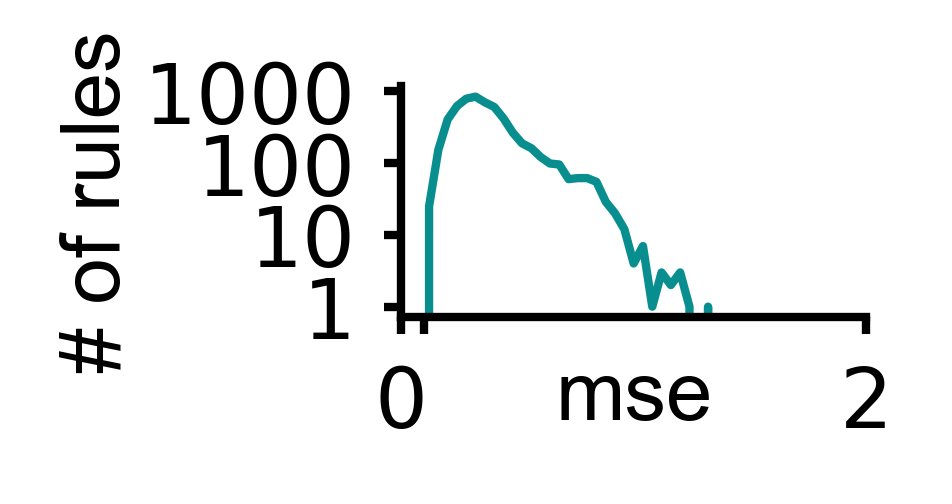

Number of rules with mse < 0.1: 120, 2.05 % of total


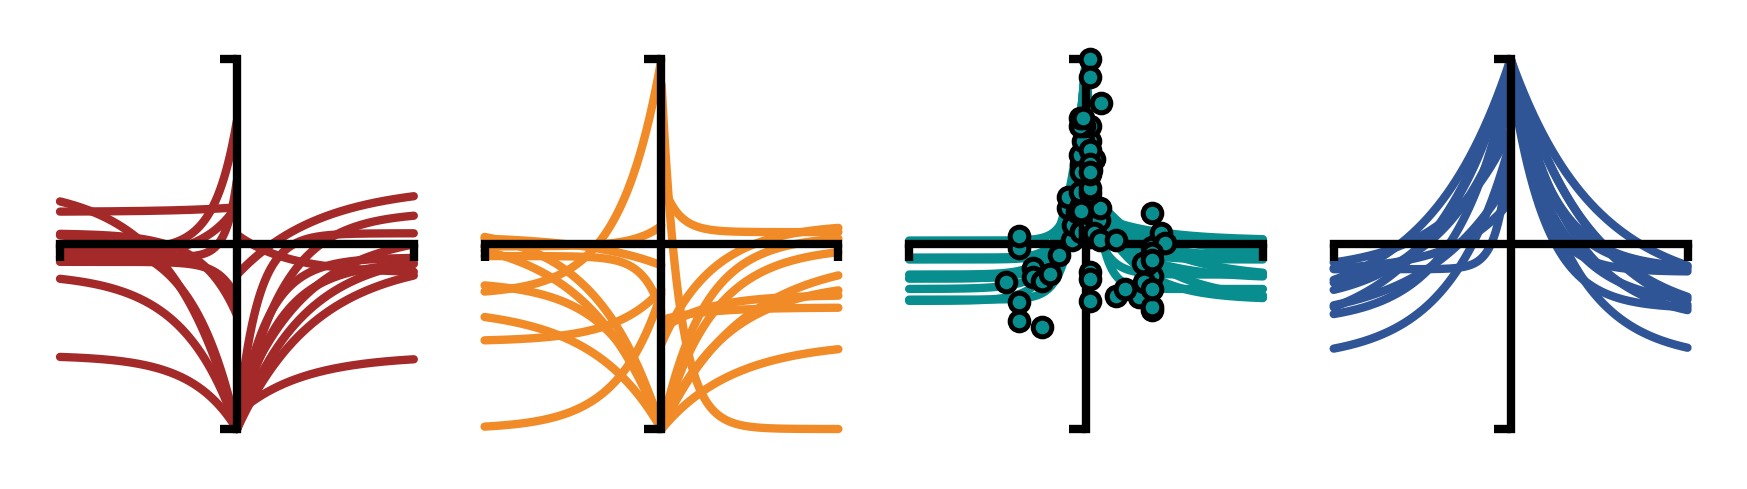

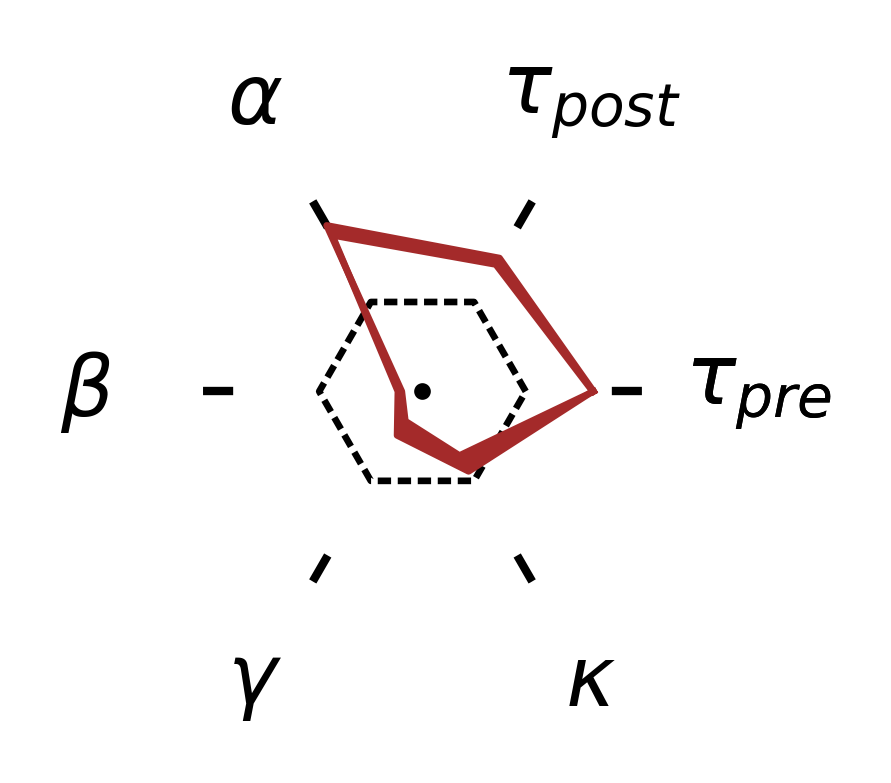

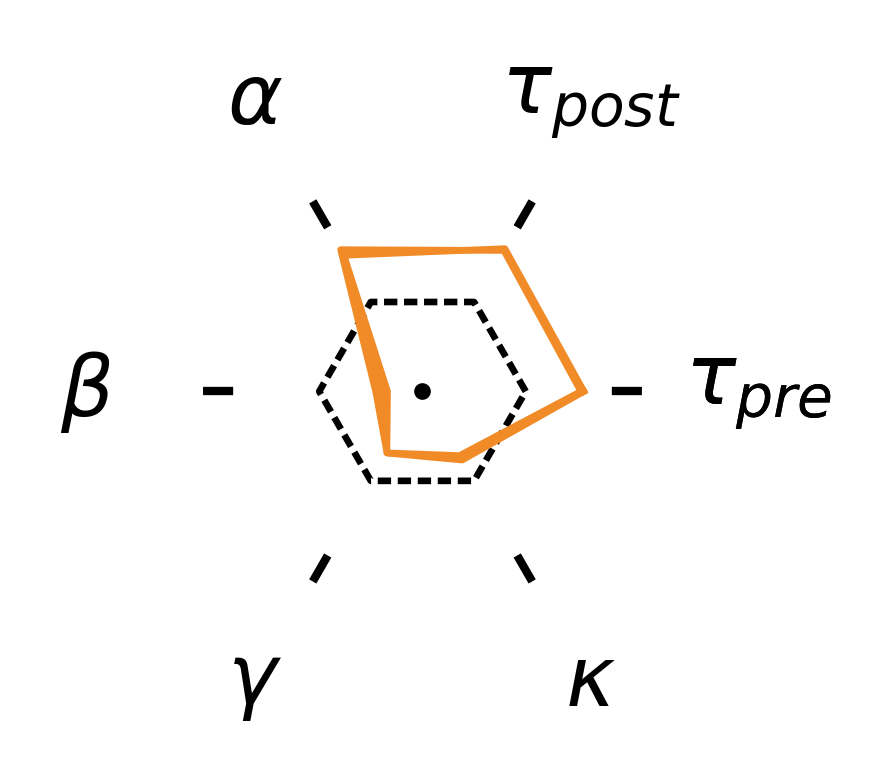

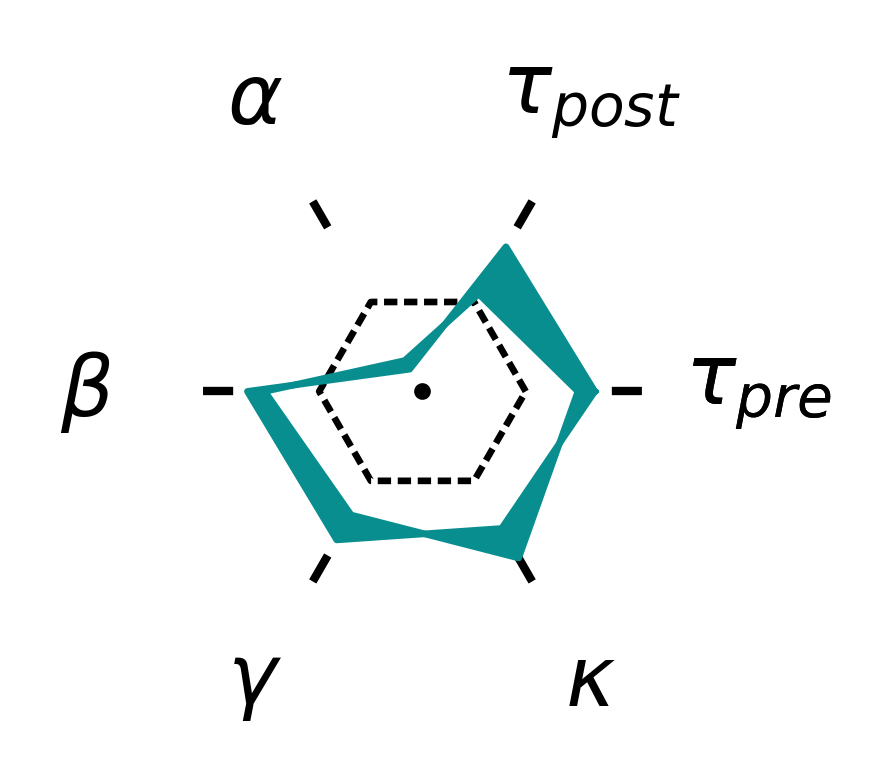

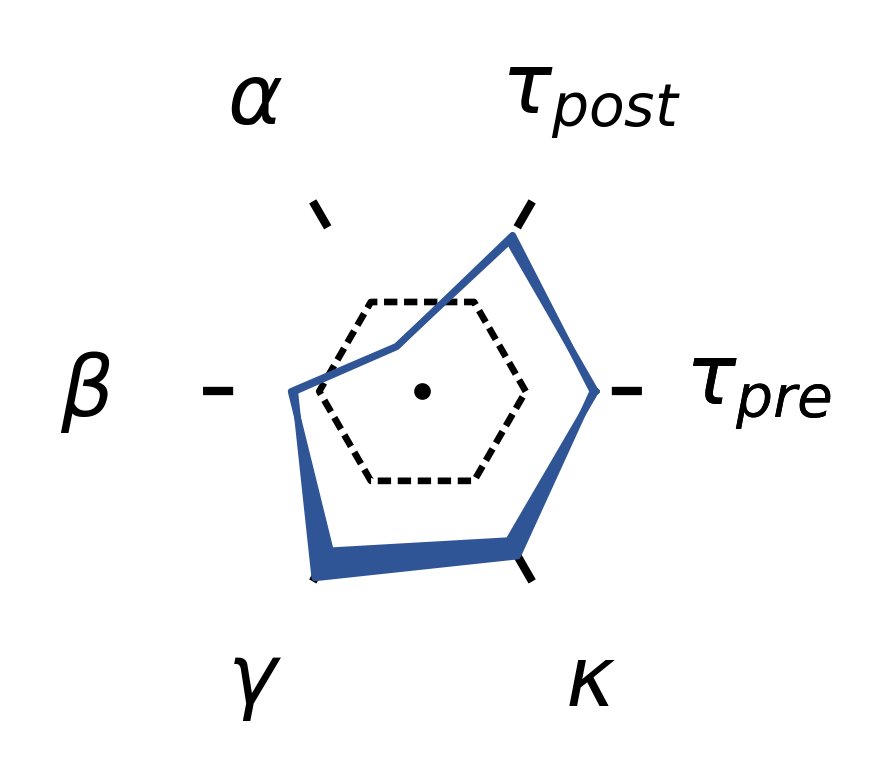

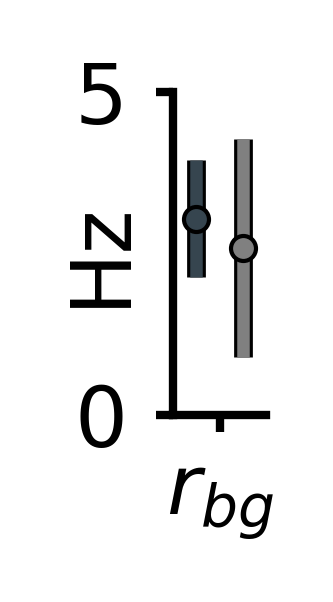

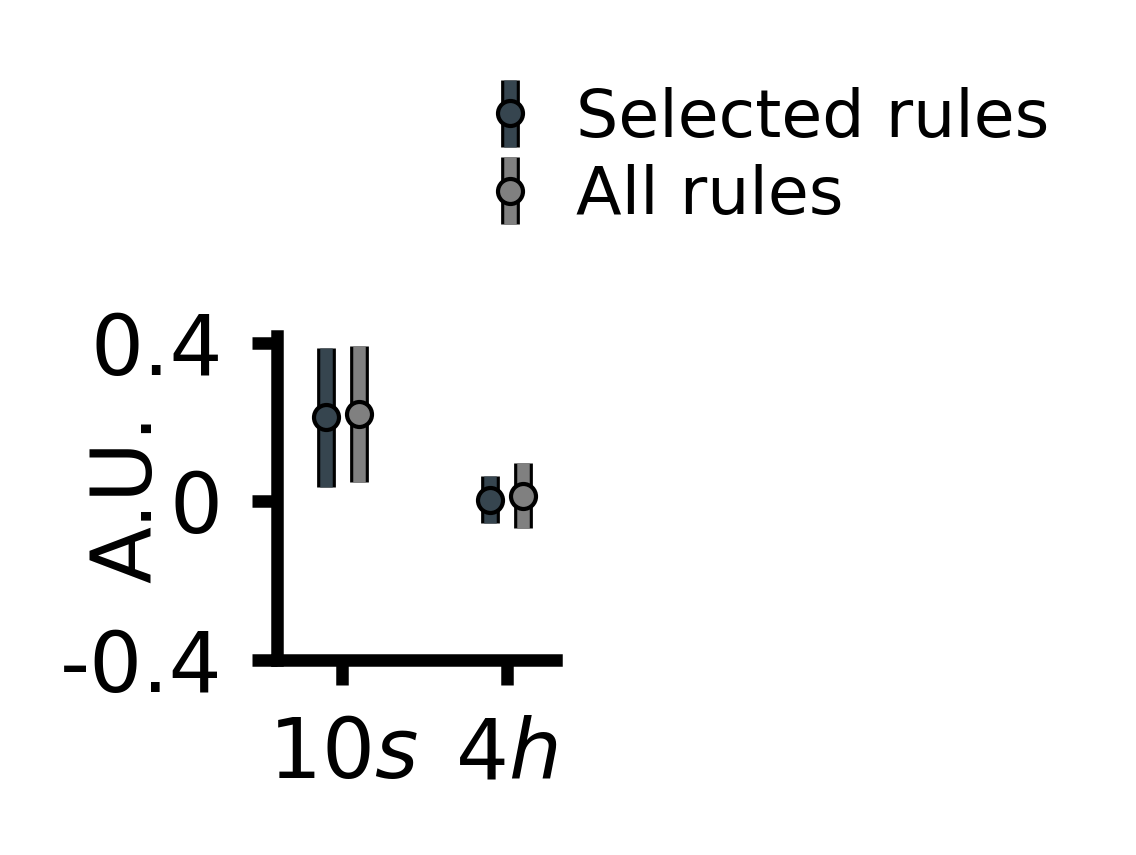

In [20]:
mse = np.zeros(n_rules)
for rule_num in range(n_rules):
    rule = d[rule_num]['theta']
    dws = aux.get_dw(rule[12:18], dt_values=woodin_x*1e-3)
    dws = dws/np.max(np.abs(dws))
    
    # compute mse:
    mse[rule_num] = np.sum((dws - woodin_ynorm)**2)/len(woodin_ynorm)

aux.plot_distance_distribution(
        data_1D=mse,
        n_bins=50, 
        range = range_plot,
        log_scale = True,
        x_lim = x_lim_plot,
        x_ticks = x_ticks_plot,
        x_ticklabels = x_ticklabels_plot,
        x_label='mse',
        labelpad_xlabel=-10,
        y_lim=None,
        y_ticks=[1,10,100,1000],
        y_ticklabels=[1,10,100,1000],
        y_label='# of rules', 
        figsize=(1,0.5),
        linewidth=1,
        title=None,
        fontsize=10,
        font="arial",
        color=aux.color_ie,
        rotation=0,
        dpi=600)

sorted_inds = np.argsort(mse)
n_good_rules = 0
while mse[sorted_inds[n_good_rules]] < 0.15 and n_good_rules < n_rules:
    n_good_rules += 1
print(f"Number of rules with mse < {cutoff}: {n_good_rules}, {n_good_rules/n_rules*100:.2f} % of total")
best_rules = d[sorted_inds[:10]]['theta']
aux.plot_4_rules_wData(best_rules[:,:-1],
                   x_datapoints = woodin_x*1e-3,
                   y_datapoints = woodin_ynorm,
                   markersize_datapoints = 20,
                   linewidth_data_marker=0.6,
                   ind_plot_datapoint = 2,
                   linewidth=1,
                   axwidth=1,
                   figsize=(3.5,0.8),
                   dpi=600,
                   color_data=aux.color_ie,
                   x_ticks=[-0.2,0.2],
                   x_ticklabels=['',''],
                   y_ticks=[-1,1],
                   y_ticklabels=['',''],
                   fontsize=10)

aux.plot_4spider_plots(d, sorted_inds)

aux.plot_rbg_comparison(d, n_good_rules, sorted_inds)

aux.plot_drmem_comparison(dr, n_good_rules, sorted_inds)